## Figure S6
TDP-43 figures

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from finches import Mpipi_frontend, CALVADOS_frontend

mf = Mpipi_frontend()
cf = CALVADOS_frontend()

# starting at 259
from sparrow import Protein
tdp43_ctd      = 'NAEPKHNSNRQLERSGRFGGNPGGFGNQGGFGNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNSYSGSNSGAAIGWGSASNAGSGSGFNGGFGSSMDSKSSGWGM'




/Users/alex/Dropbox/WASHU/Holehouse/tools/finches/finches/finches/forcefields/calvados.py:235: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.038286503882254706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  r.loc['H','q'] = 1. / ( 1 + 10**(self.pH-6) )


In [2]:
Protein(tdp43_ctd).show_sequence(blocksize=50,newline=50)

In [3]:
start_res = 263
for i in [15, 35,55,75, 95,115, 135]:
    print(start_res+i)


278
298
318
338
358
378
398


CPU times: user 3.8 s, sys: 3.46 s, total: 7.26 s
Wall time: 3.15 s


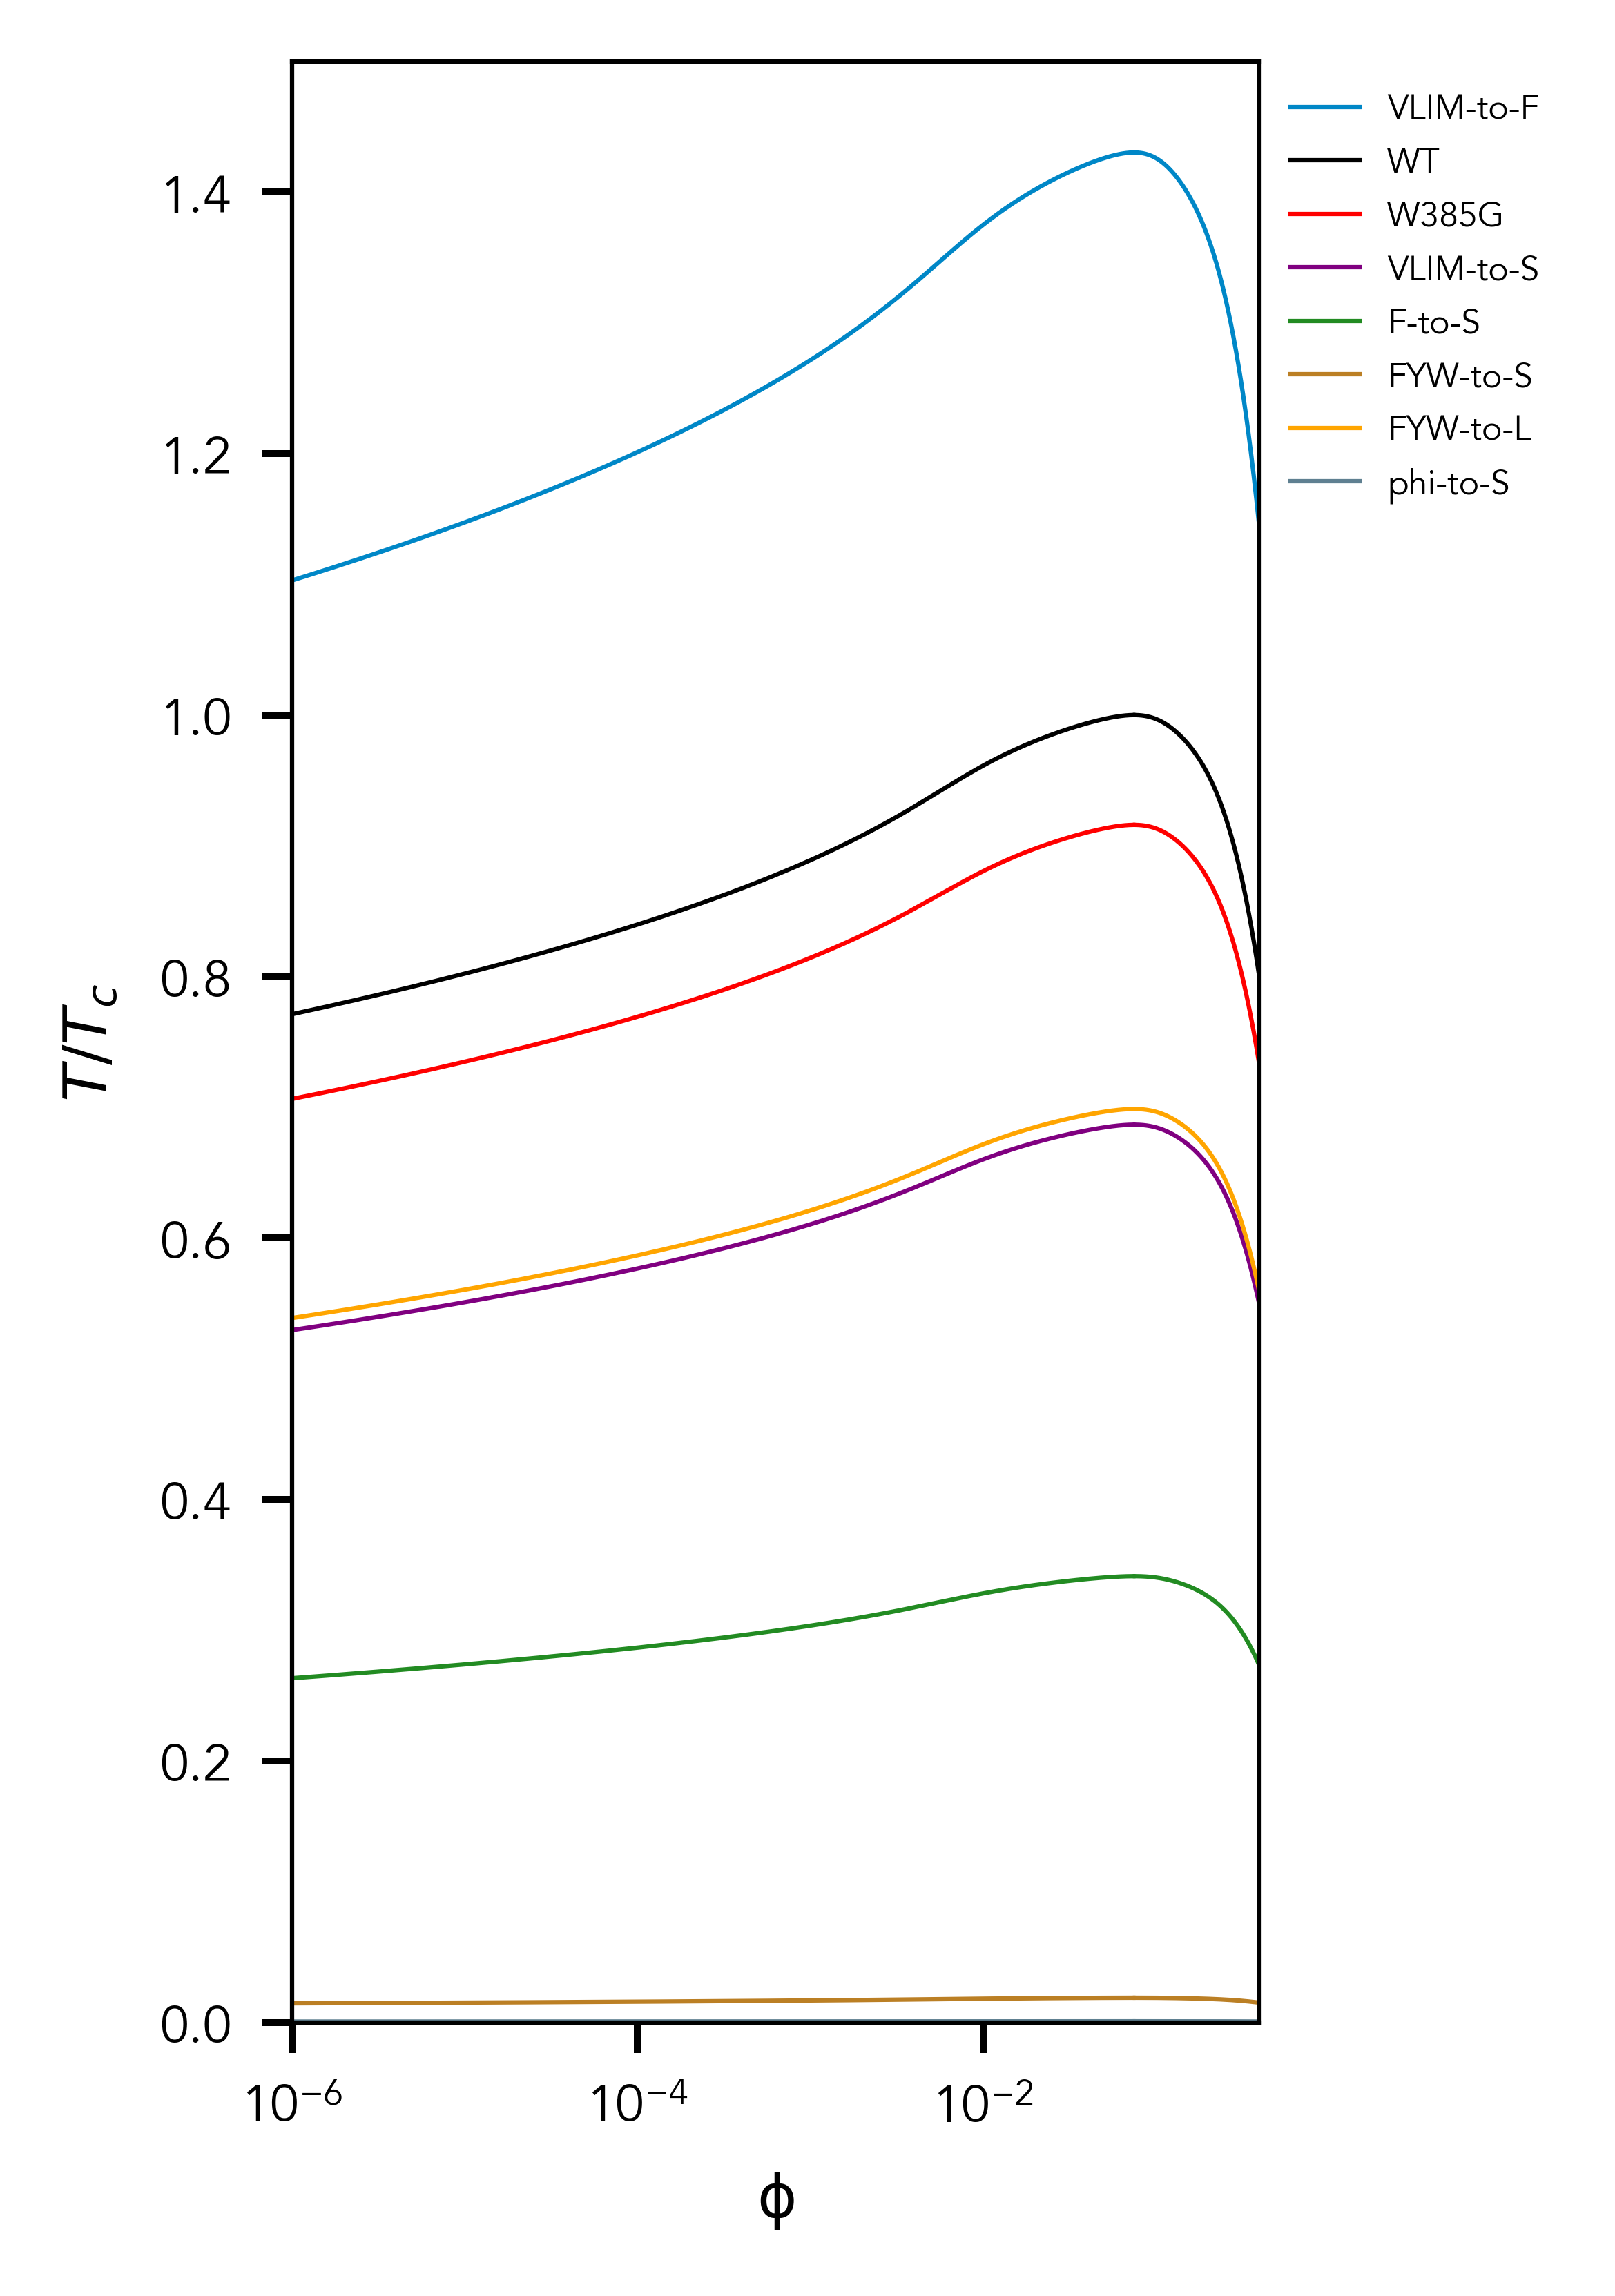

In [4]:
%%time

tdp43_seqs = {}
tdp43_seqs['VLIM-to-F'] = ['KHNSNRQFERSGRFGGNPGGFGNQGGFGNSRGGGAGFGNNQGSNFGGGFNFGAFSFNPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNFQREPNQAFGSGNNSYSGSNSGAAFGWGSASNAGSGSGFNGGFGSSFDSKSSGWGF', '#0087C7']
tdp43_seqs['WT'] = ['KHNSNRQLERSGRFGGNPGGFGNQGGFGNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNSYSGSNSGAAIGWGSASNAGSGSGFNGGFGSSMDSKSSGWGM', 'k']
tdp43_seqs['W385G'] = ['KHNSNRQLERSGRFGGNPGGFGNQGGFGNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNSYSGSNSGAAIGGGSASNAGSGSGFNGGFGSSMDSKSSGWGM', 'r']
tdp43_seqs['VLIM-to-S'] = ['KHNSNRQSERSGRFGGNPGGFGNQGGFGNSRGGGAGSGNNQGSNSGGGSNFGAFSSNPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNSQREPNQAFGSGNNSYSGSNSGAASGWGSASNAGSGSGFNGGFGSSSDSKSSGWGS', 'purple']
tdp43_seqs['F-to-S'] = ['KHNSNRQLERSGRSGGNPGGSGNQGGSGNSRGGGAGLGNNQGSNMGGGMNSGASSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQASGSGNNSYSGSNSGAAIGWGSASNAGSGSGSNGGSGSSMDSKSSGWGM', 'forestgreen']
tdp43_seqs['FYW-to-S'] = ['KHNSNRQLERSGRSGGNPGGSGNQGGSGNSRGGGAGLGNNQGSNMGGGMNSGASSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQASGSGNNSSSGSNSGAAIGSGSASNAGSGSGSNGGSGSSMDSKSSGSGM', '#BB7F24']
tdp43_seqs['FYW-to-L'] = ['KHNSNRQLERSGRLGGNPGGLGNQGGLGNSRGGGAGLGNNQGSNMGGGMNLGALSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQALGSGNNSLSGSNSGAAIGLGSASNAGSGSGLNGGLGSSMDSKSSGLGM', 'orange']
tdp43_seqs['phi-to-S'] = ['KHNSNRQSERSGRSGGNPGGSGNQGGSGNSRGGGAGSGNNQGSNSGGGSNSGASSSNPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNSQREPNQASGSGNNSSSGSNSGAASGSGSASNAGSGSGSNGGSGSSSDSKSSGSGS', '#5F8091']



out = cf.plot_multiple_phase_diagrams(tdp43_seqs, tc_ref='WT', xlim=[0.000001,0.4], ylim=[0,1.5],height=3.8,xlog=True, width=2.7, filename='out_figures/tdp43_phase_diagram.pdf')

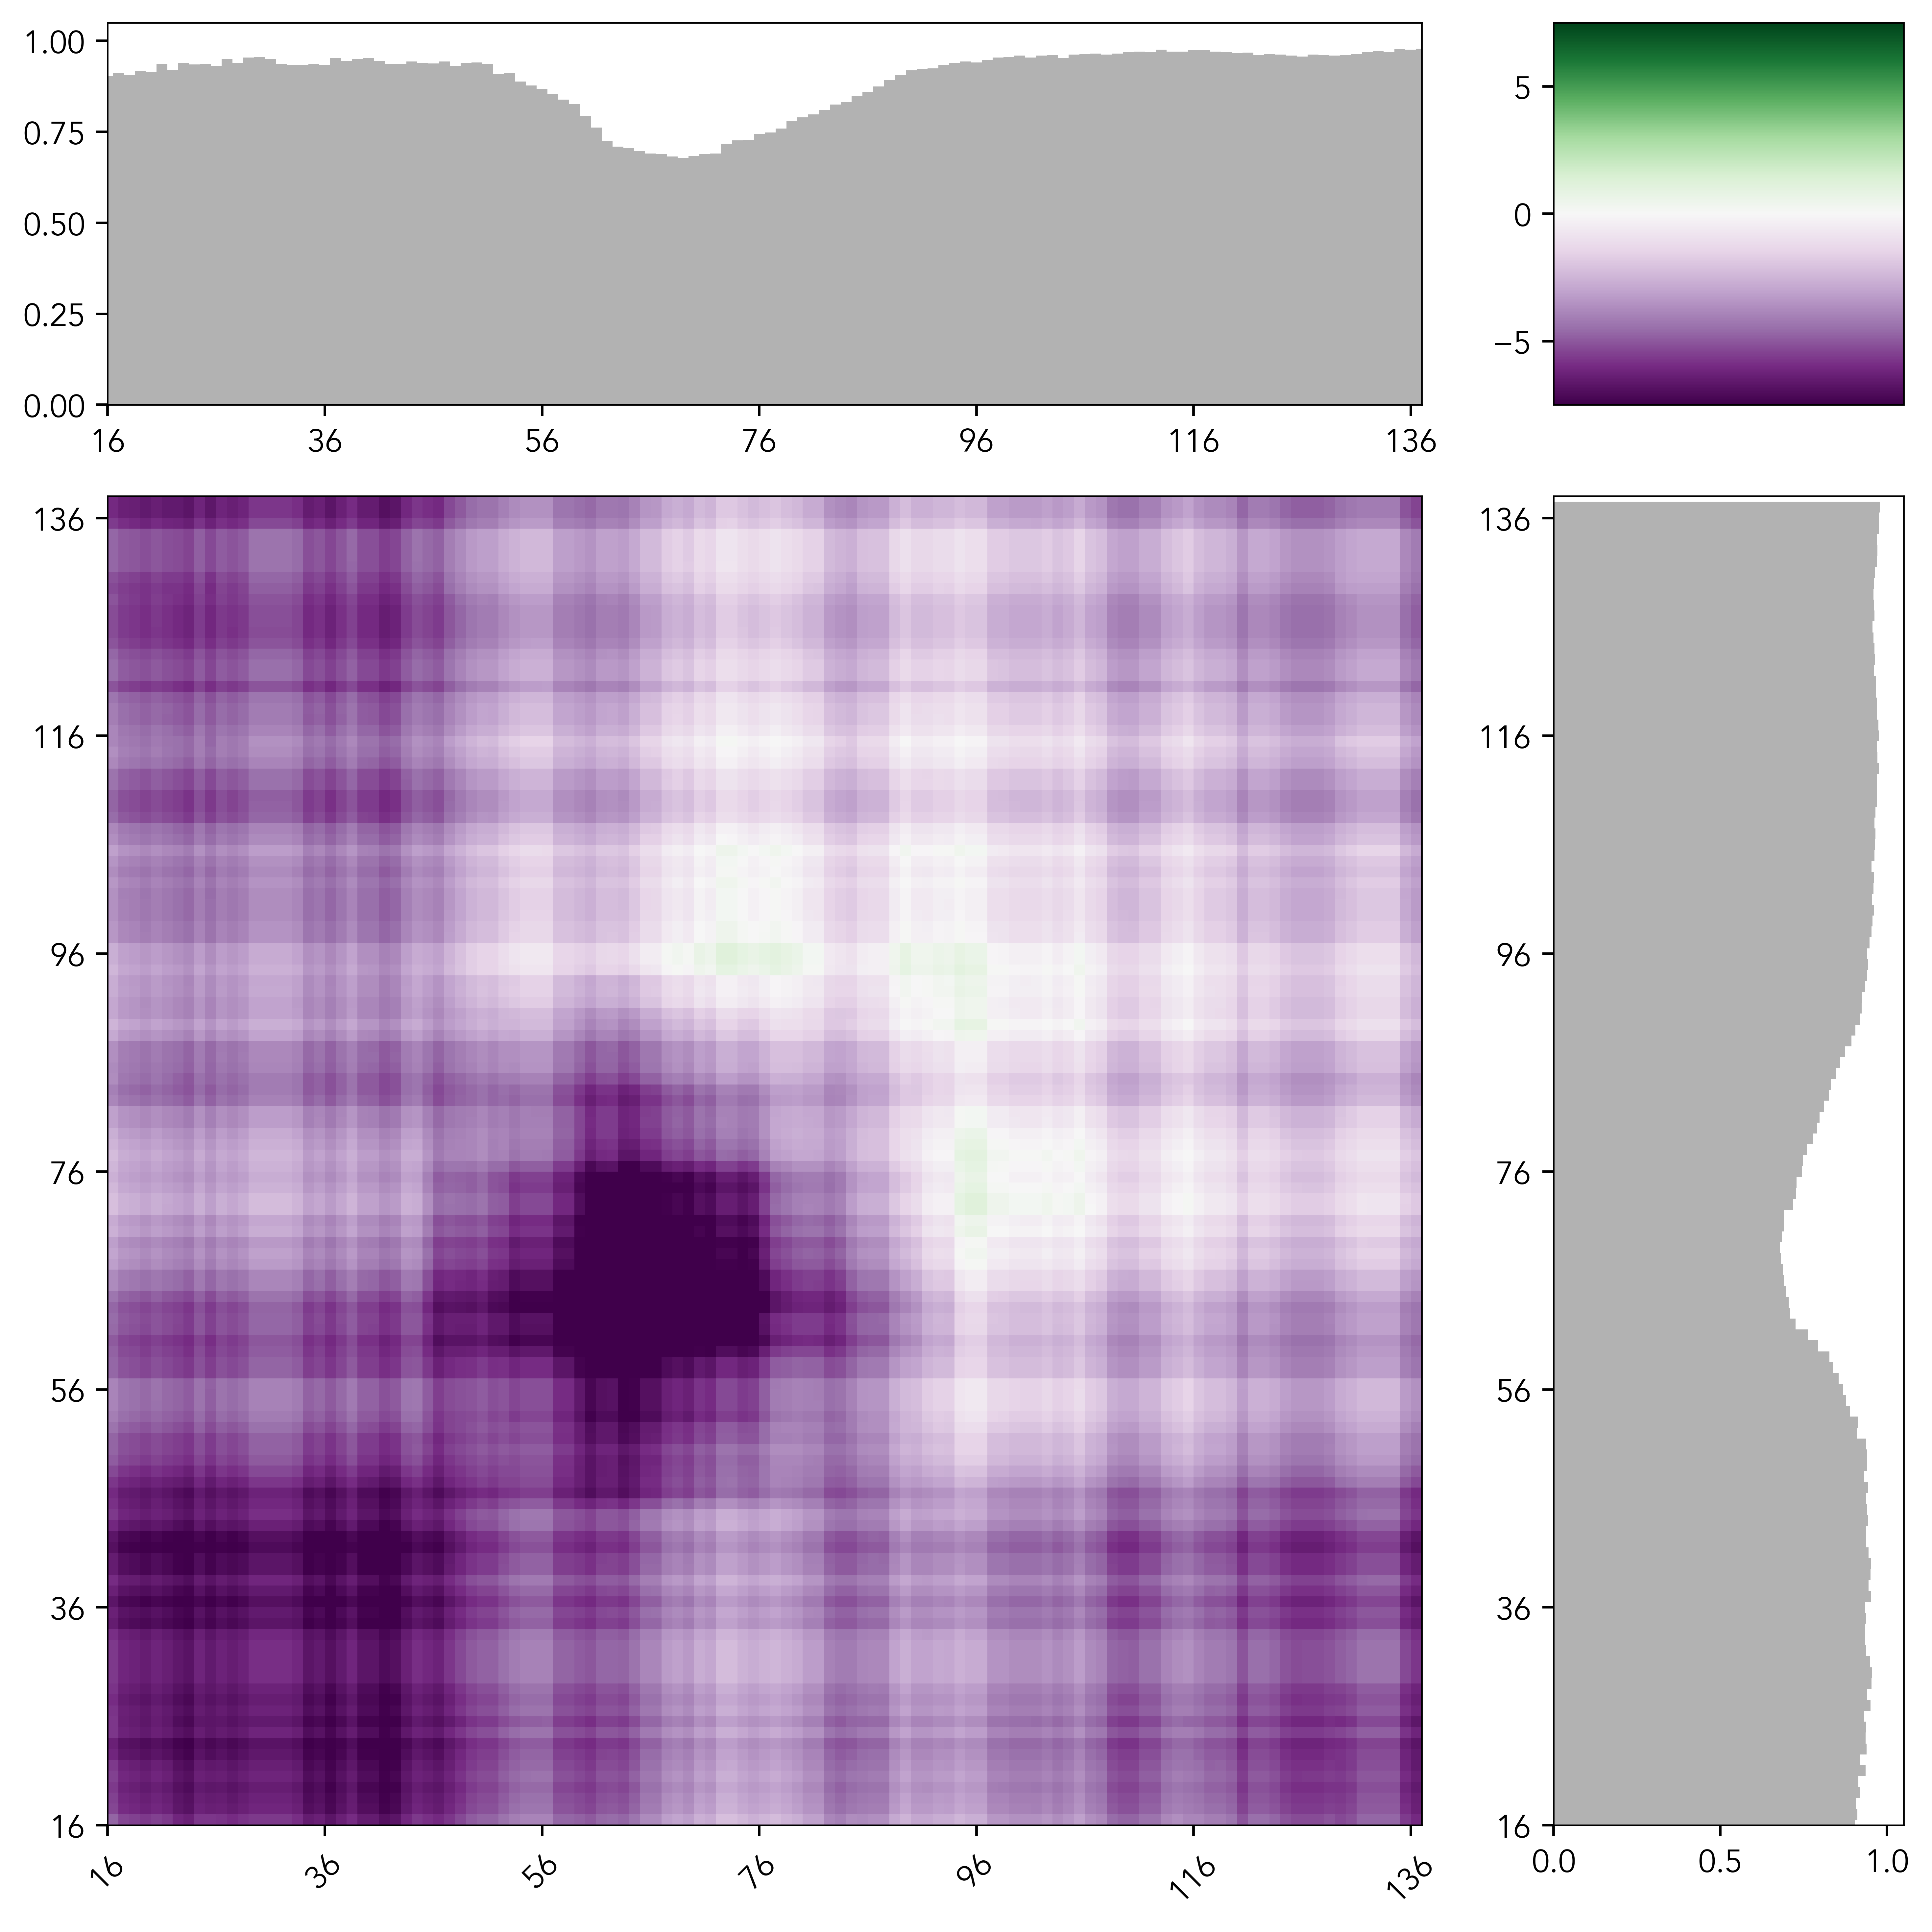

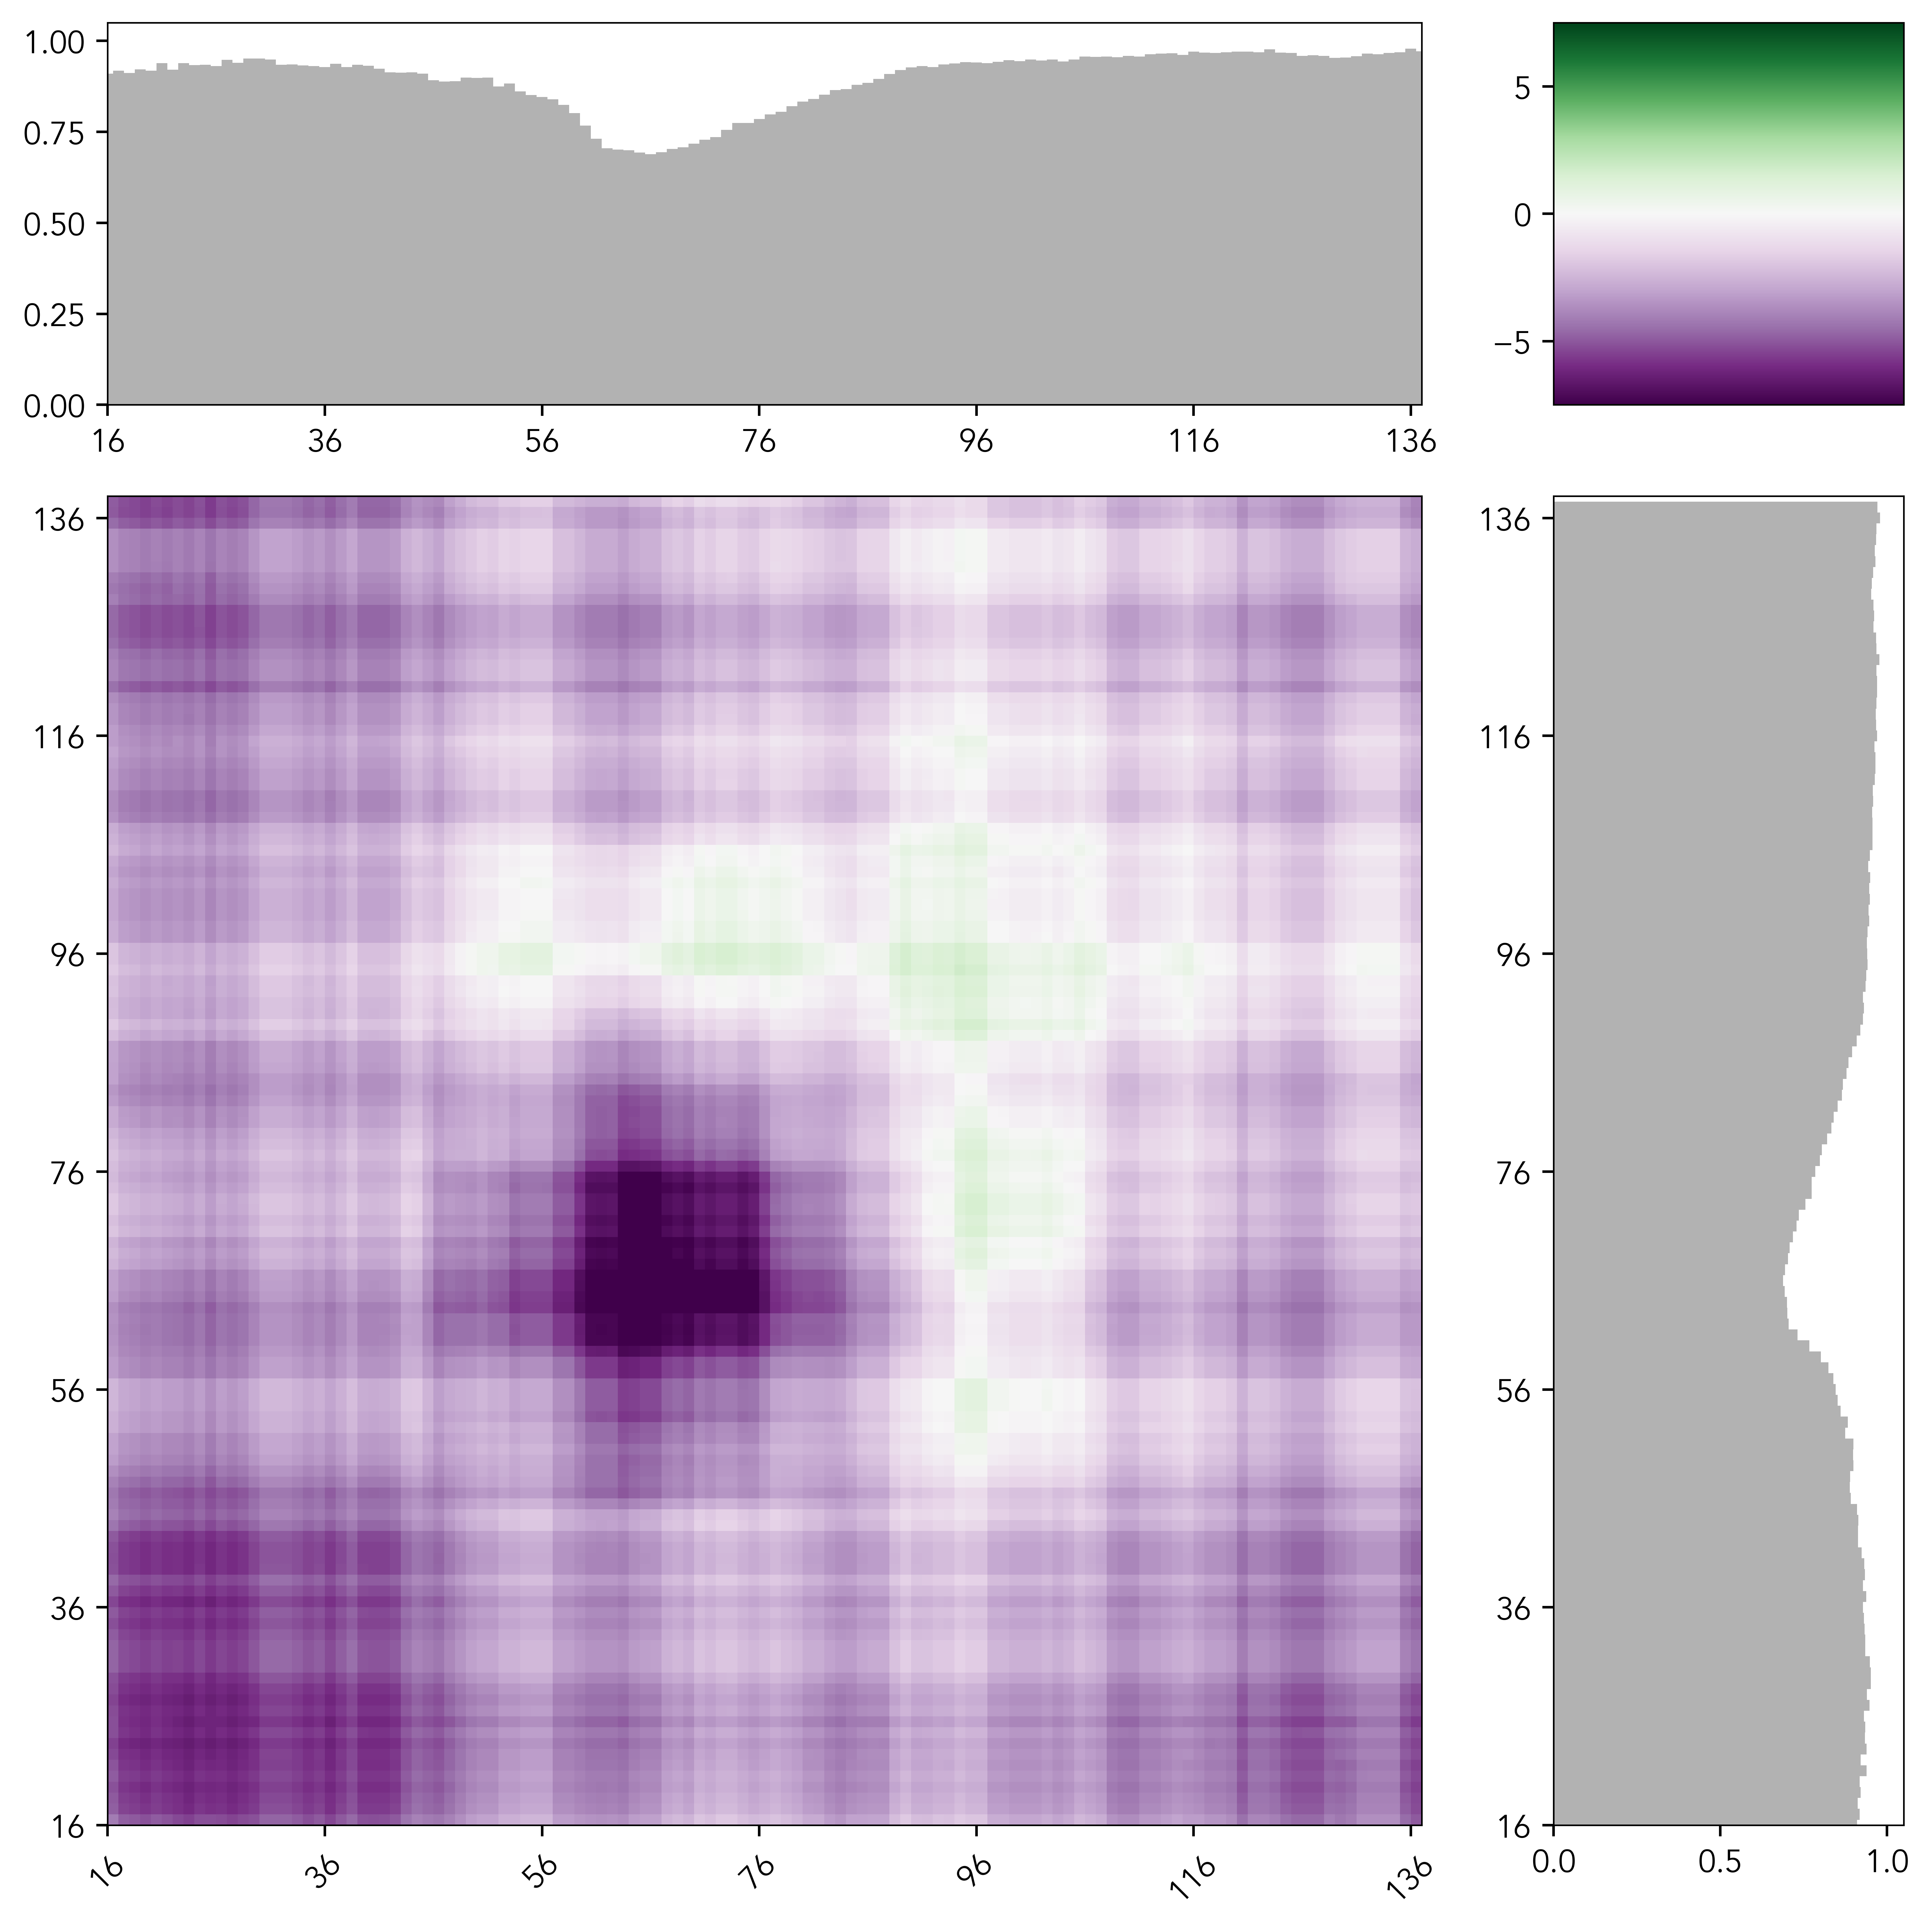

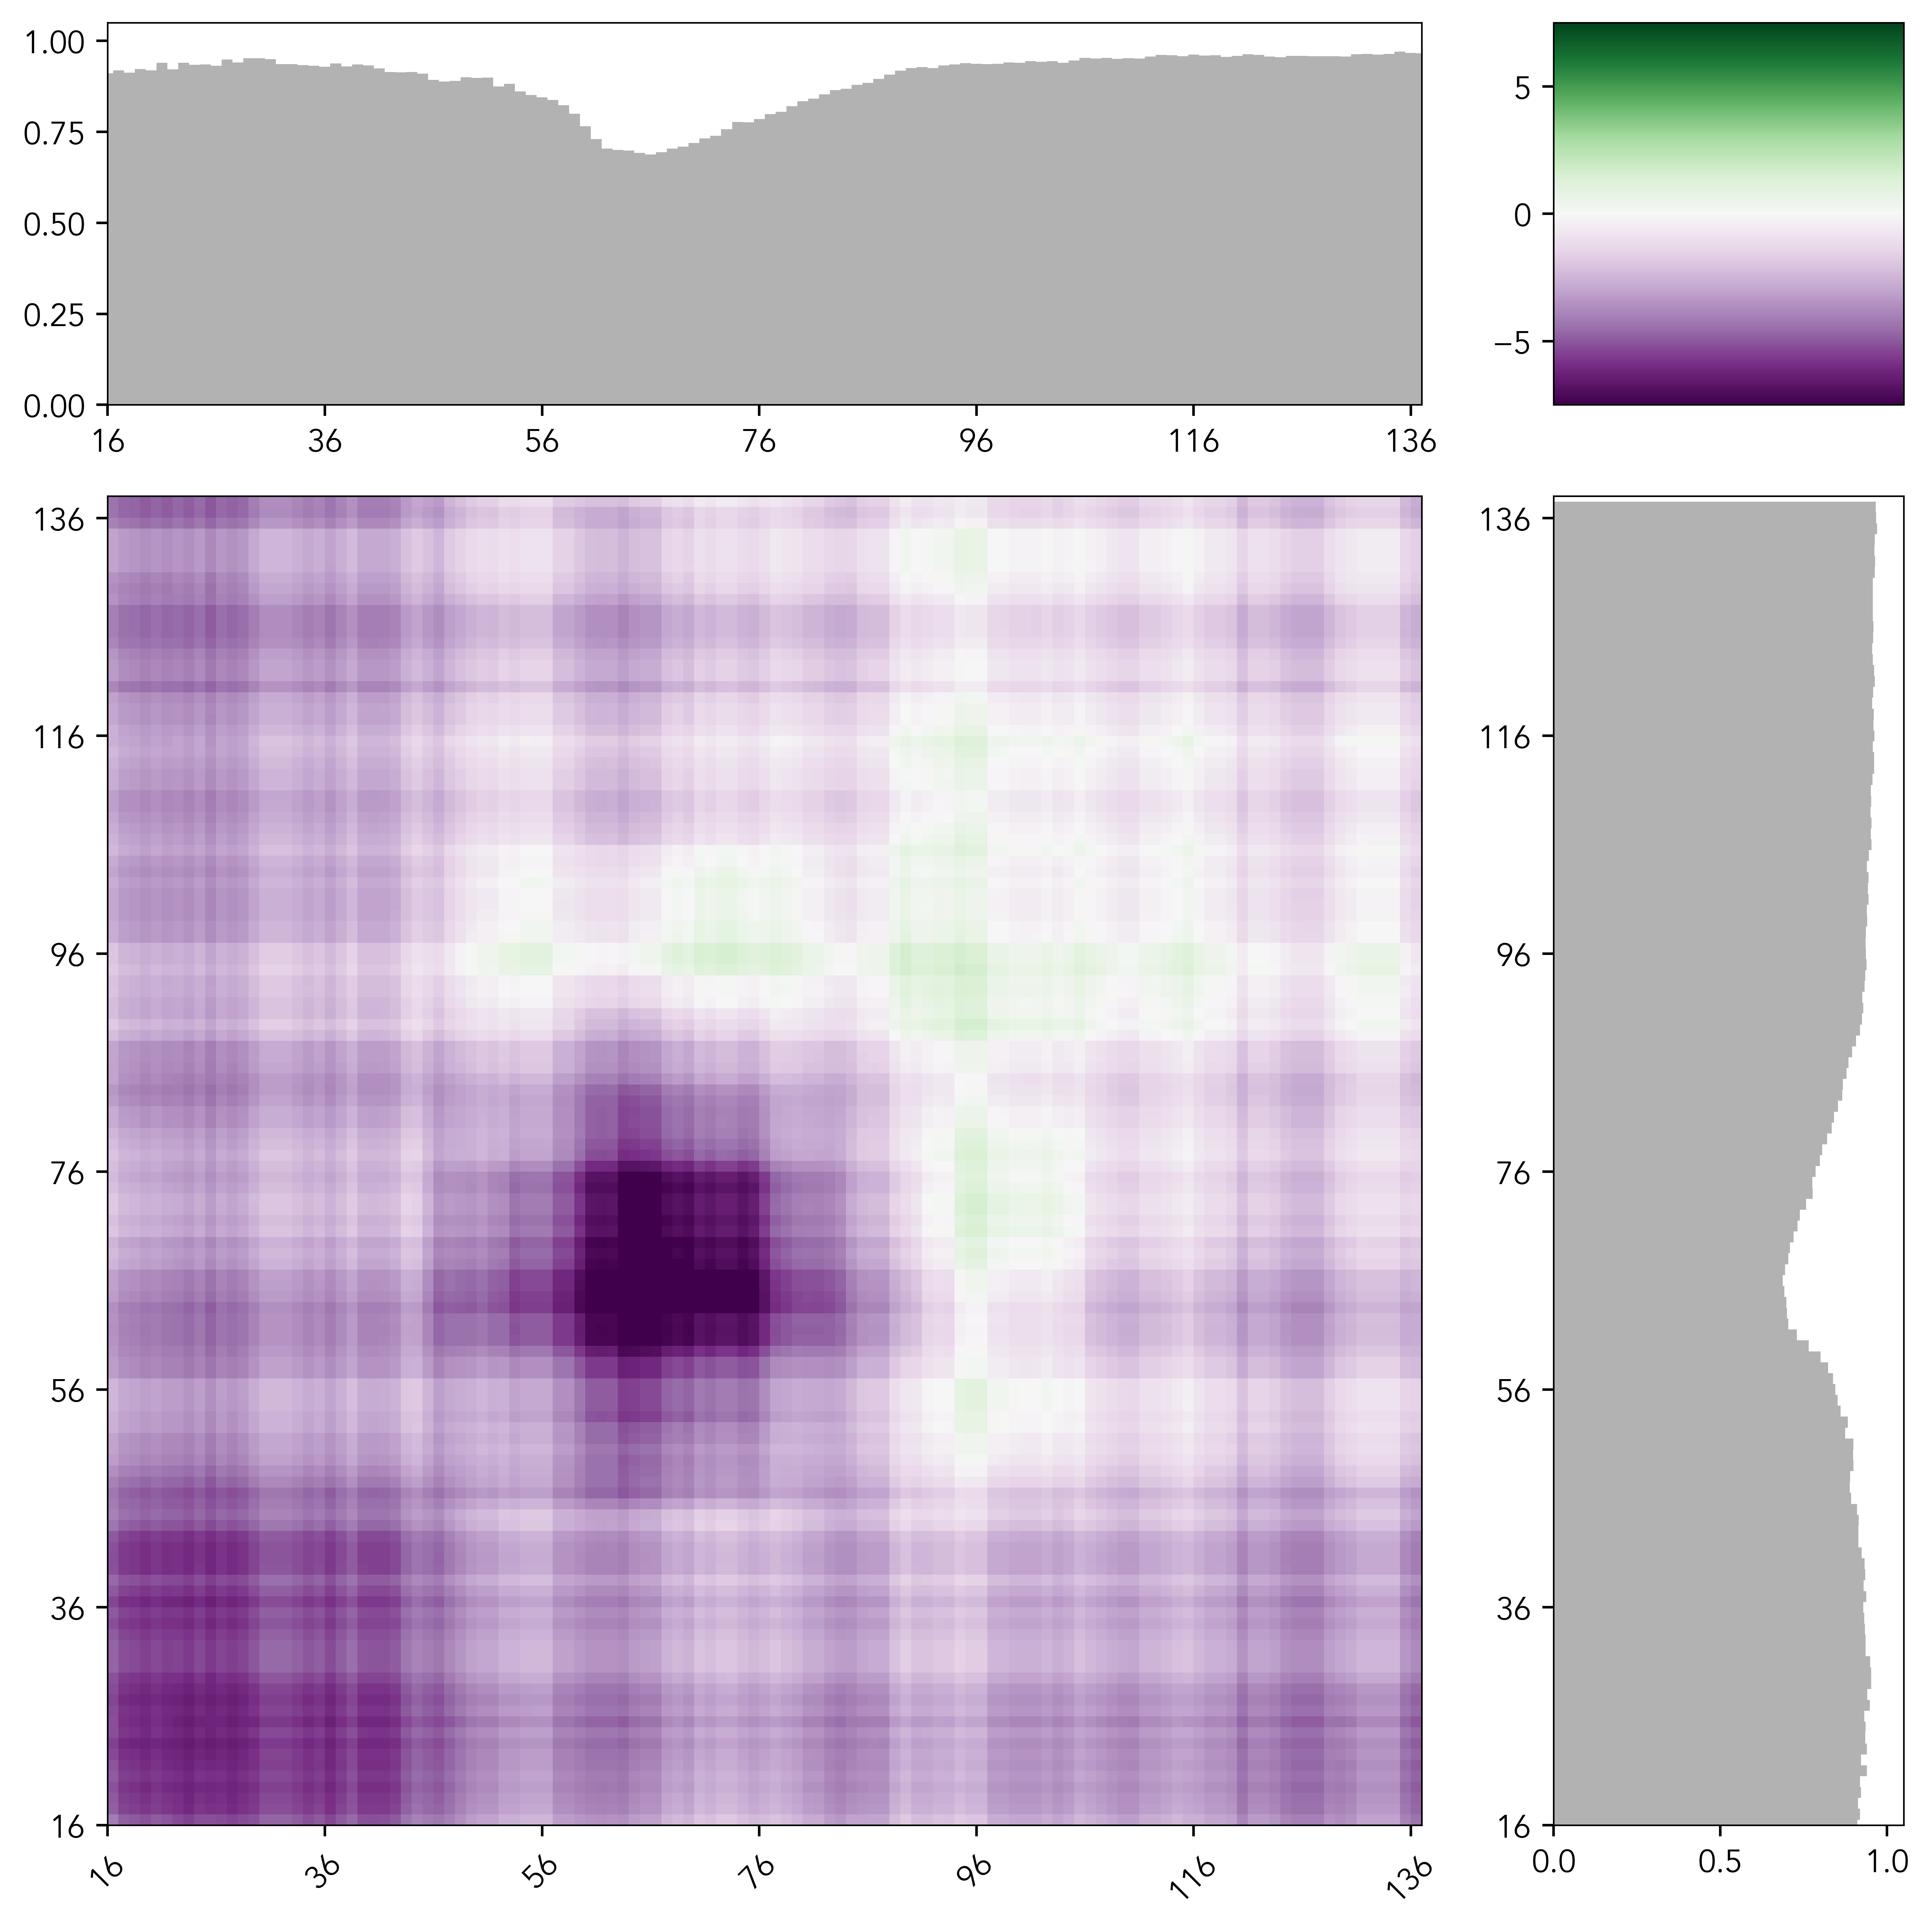

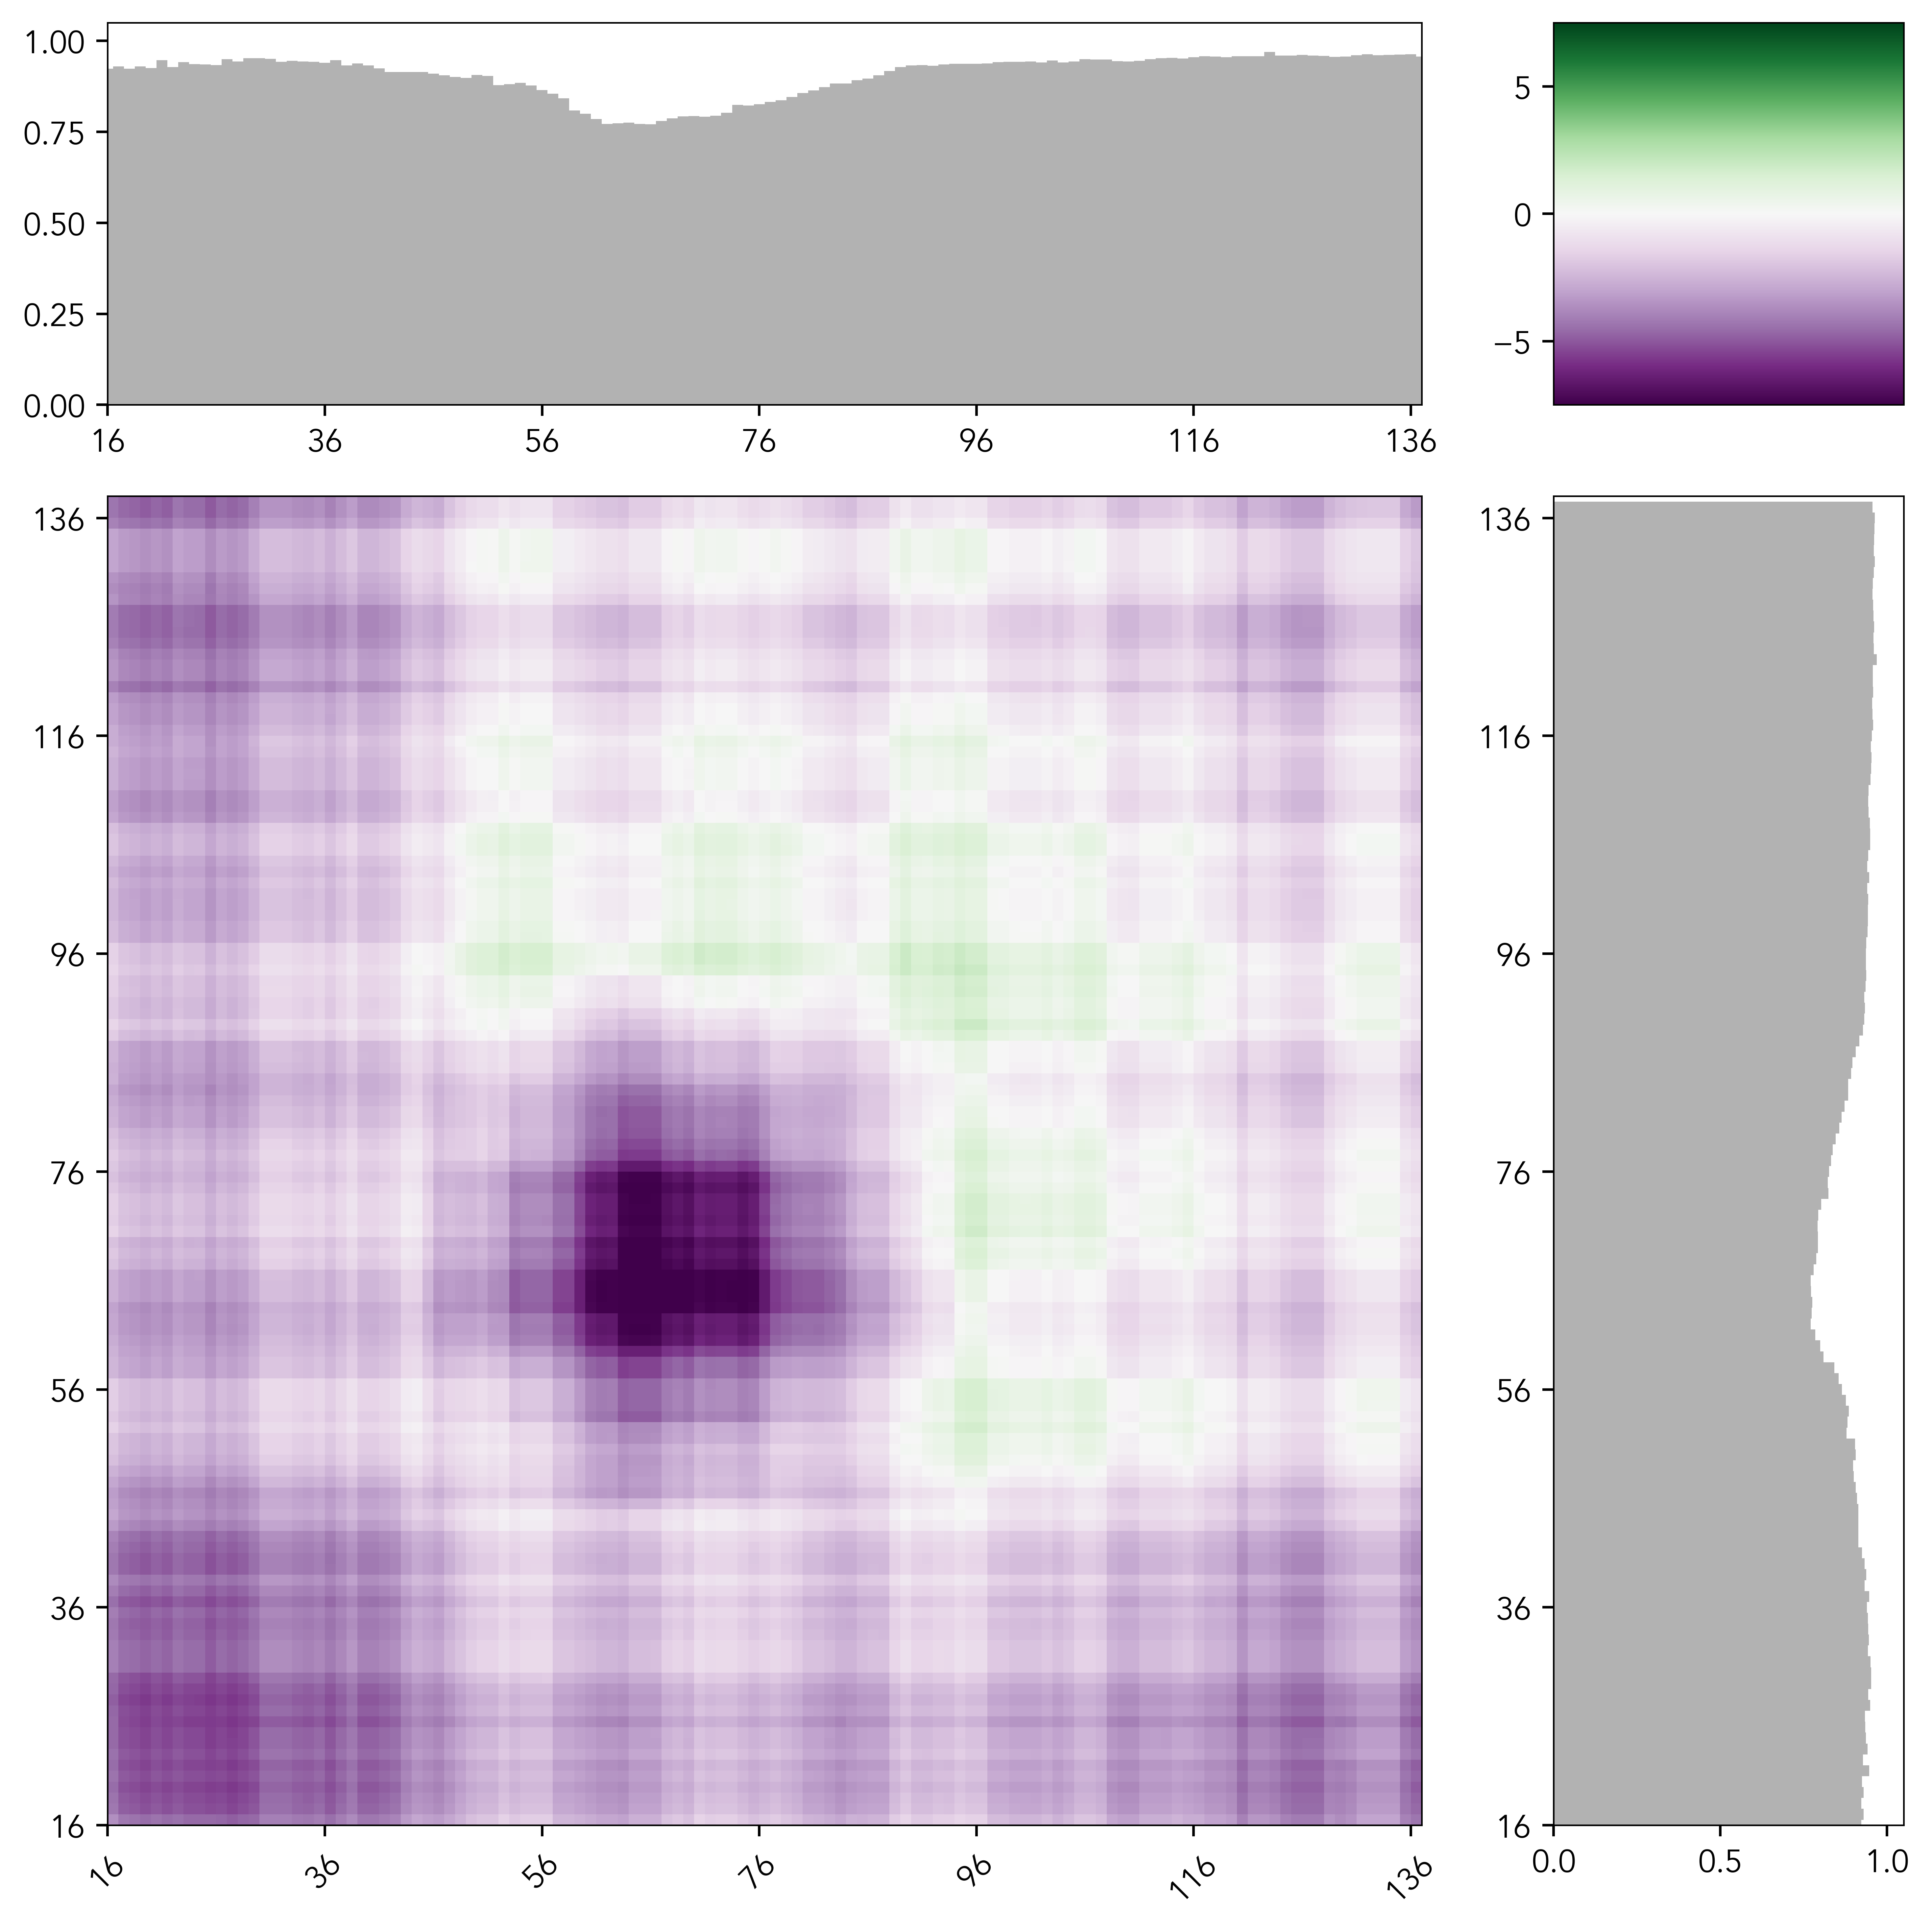

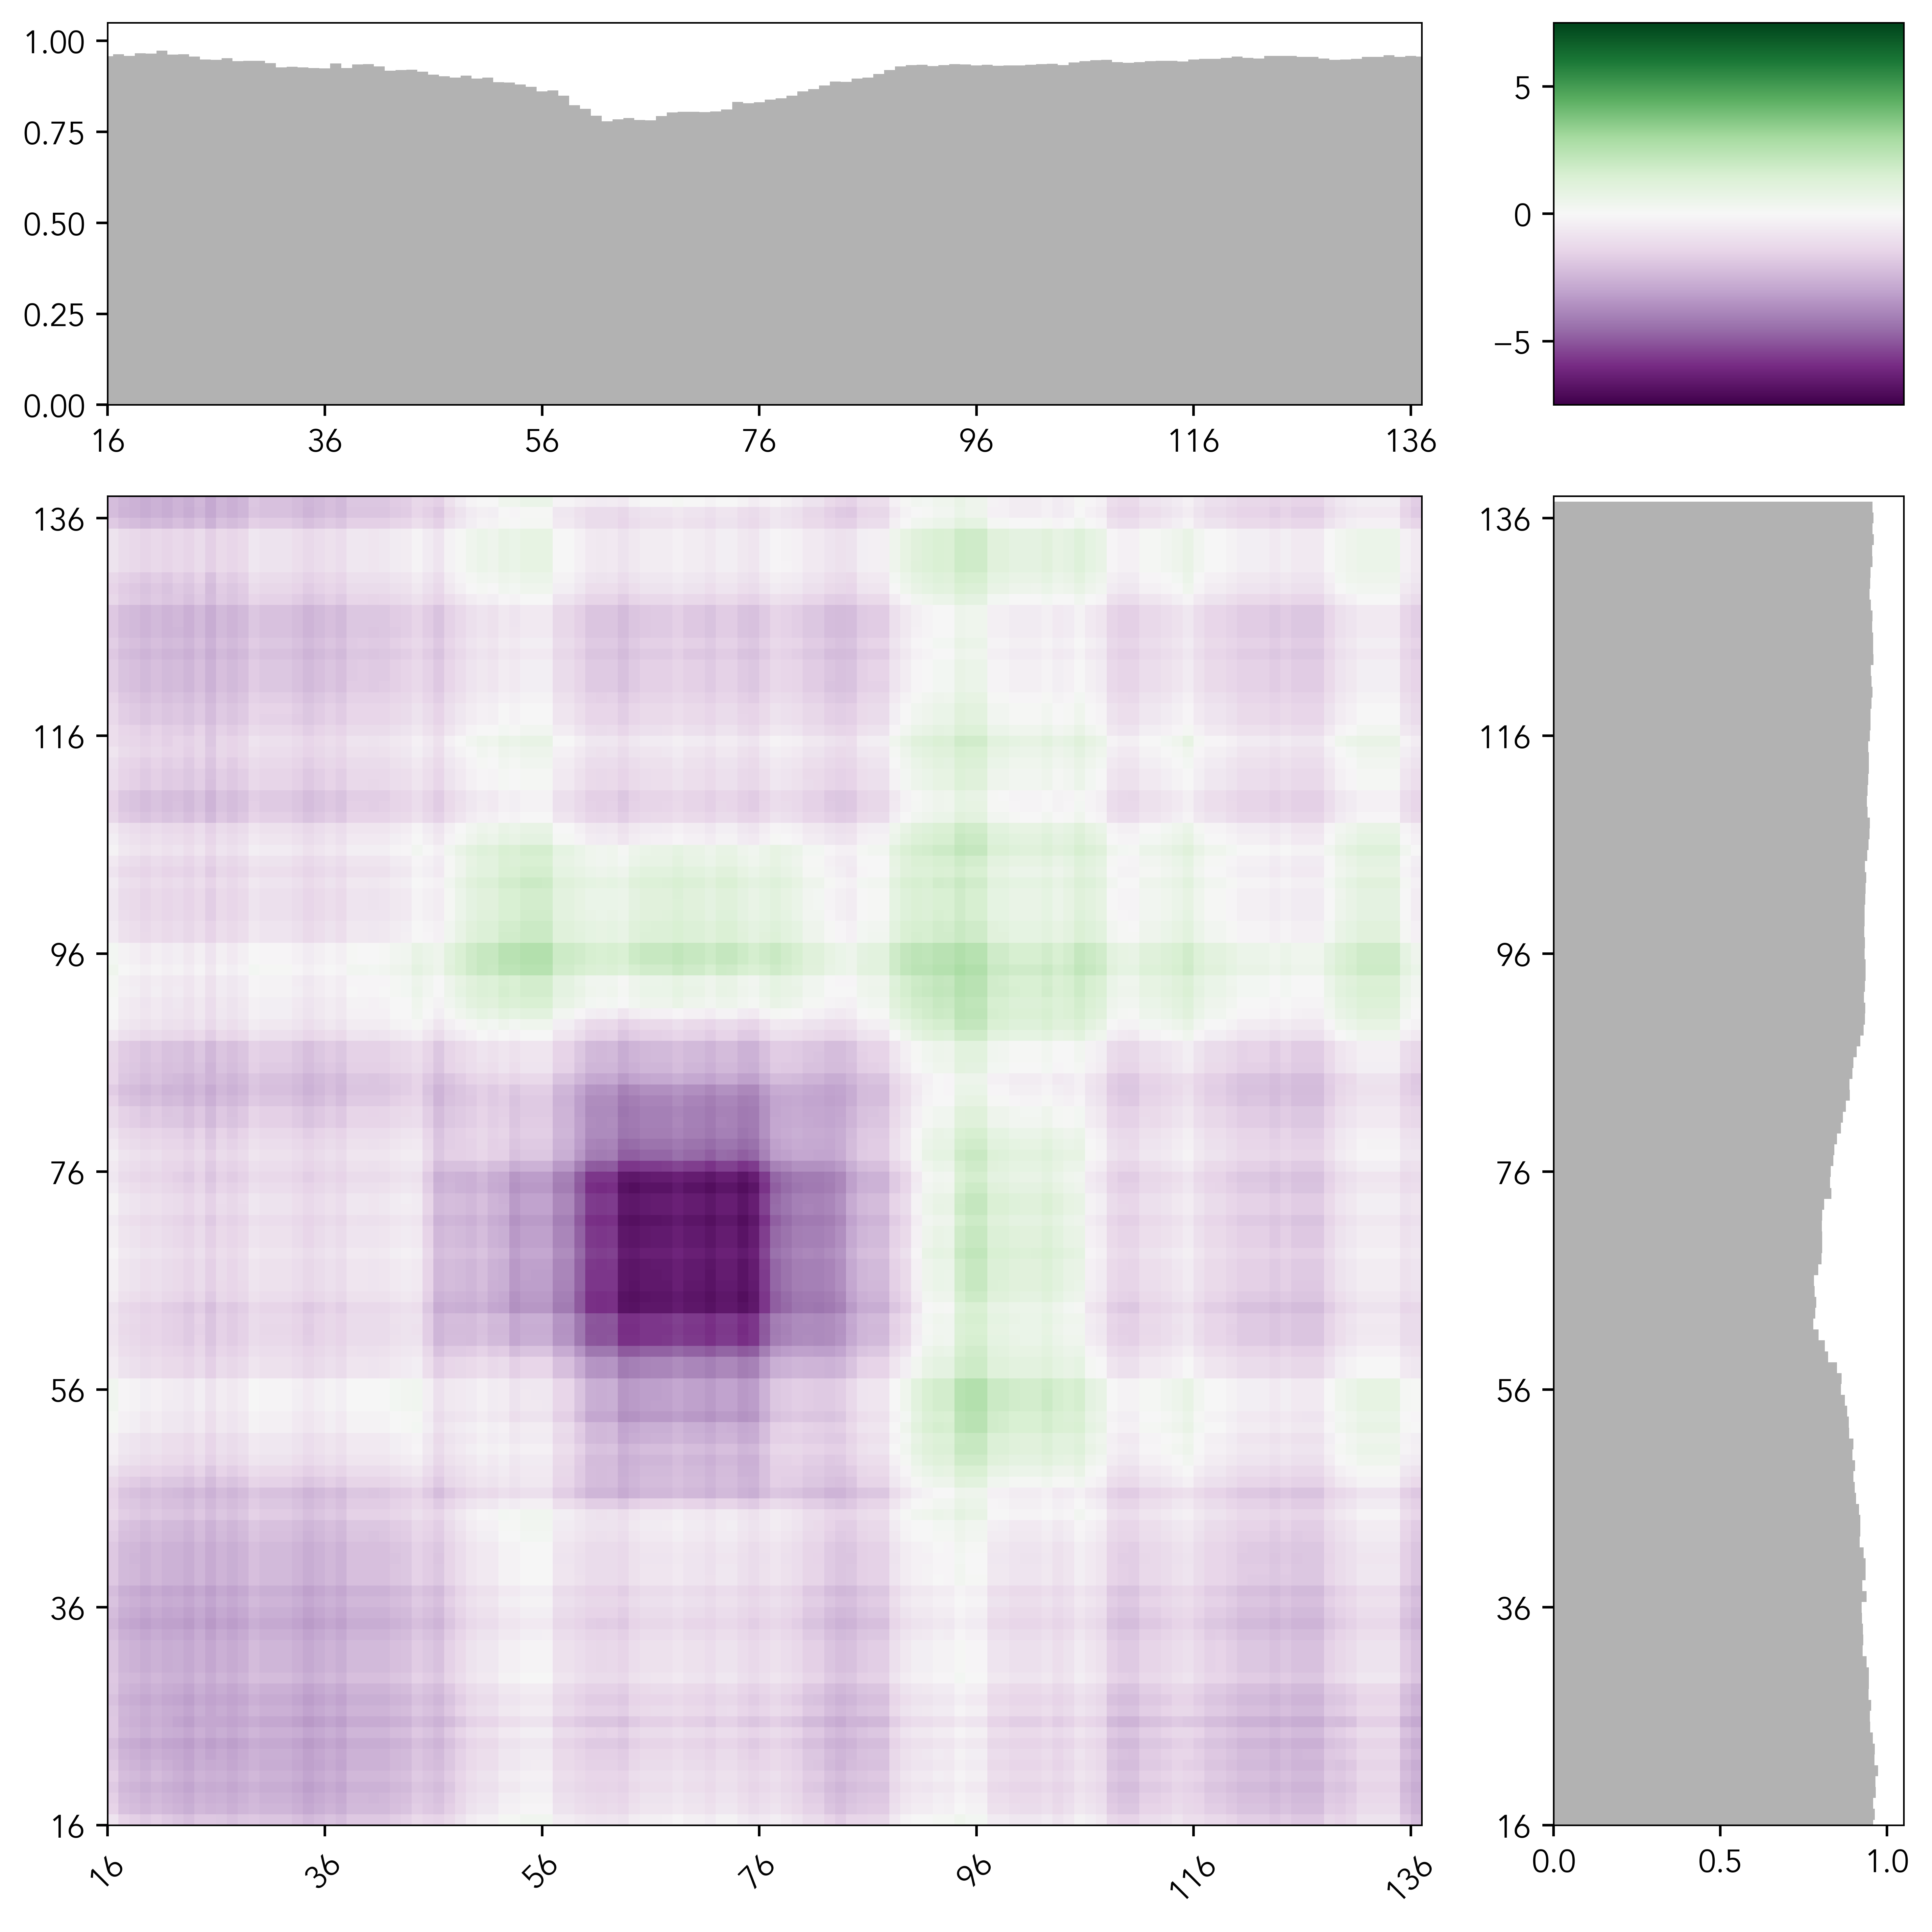

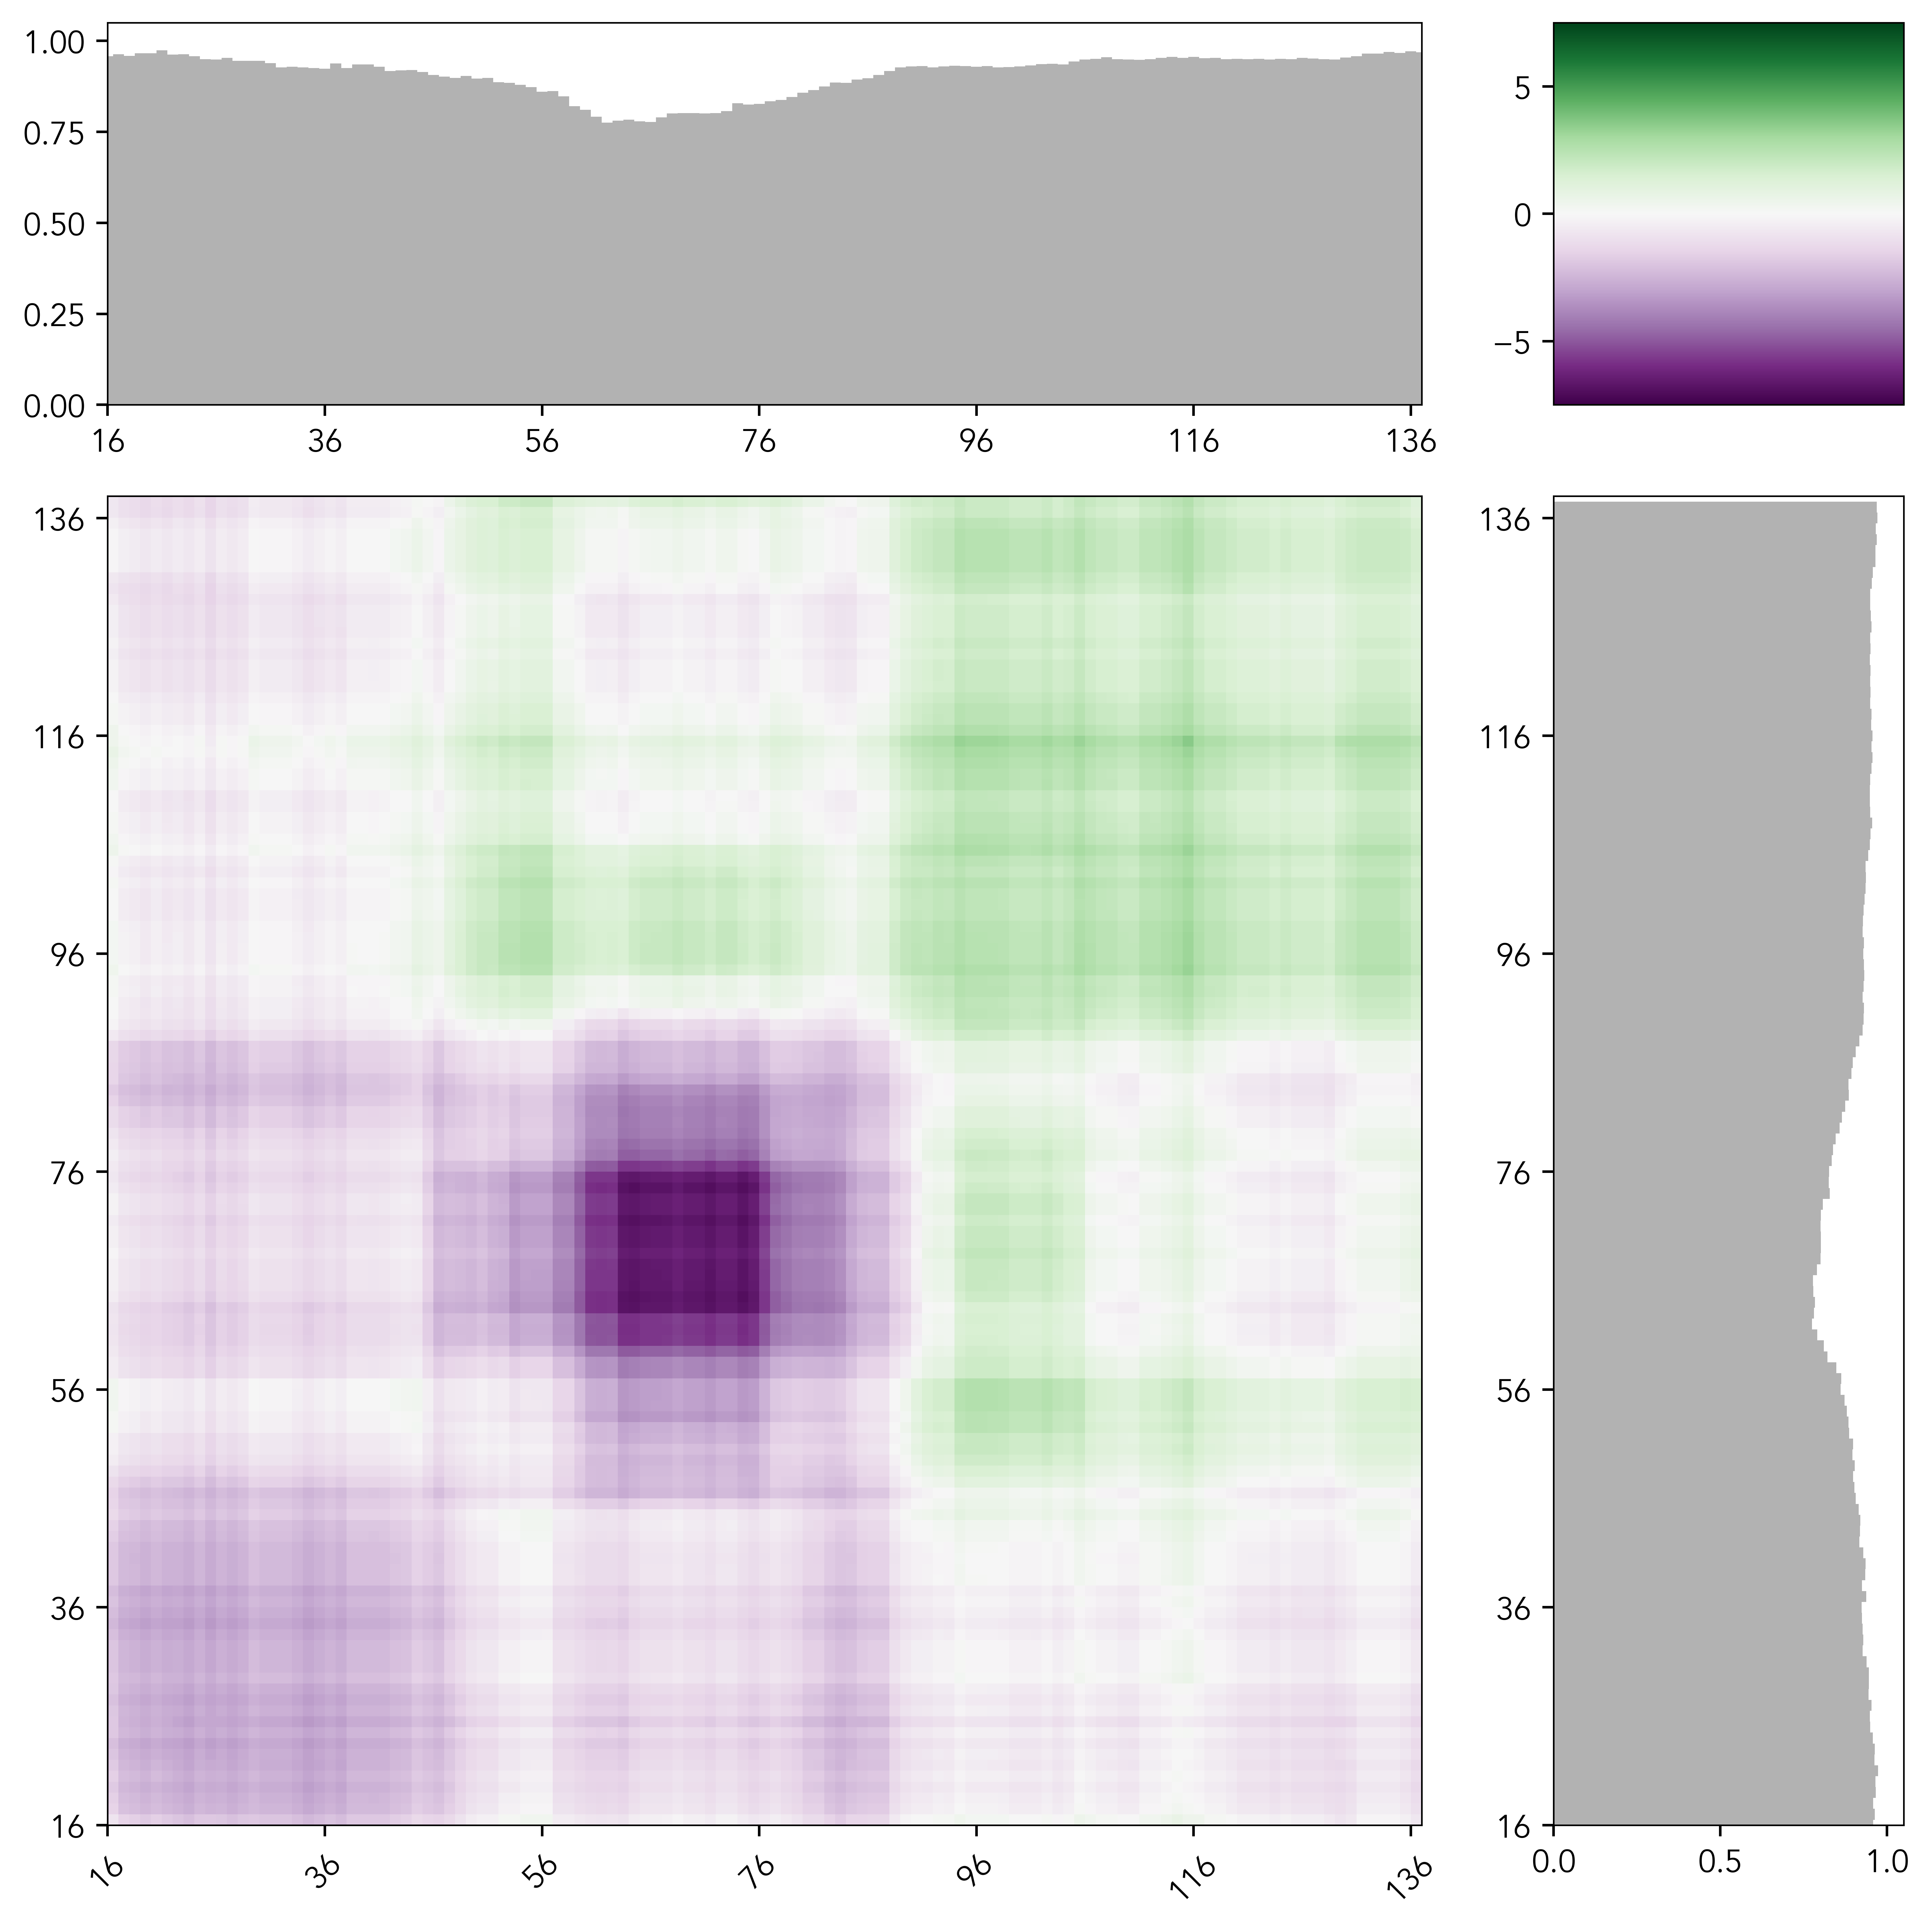

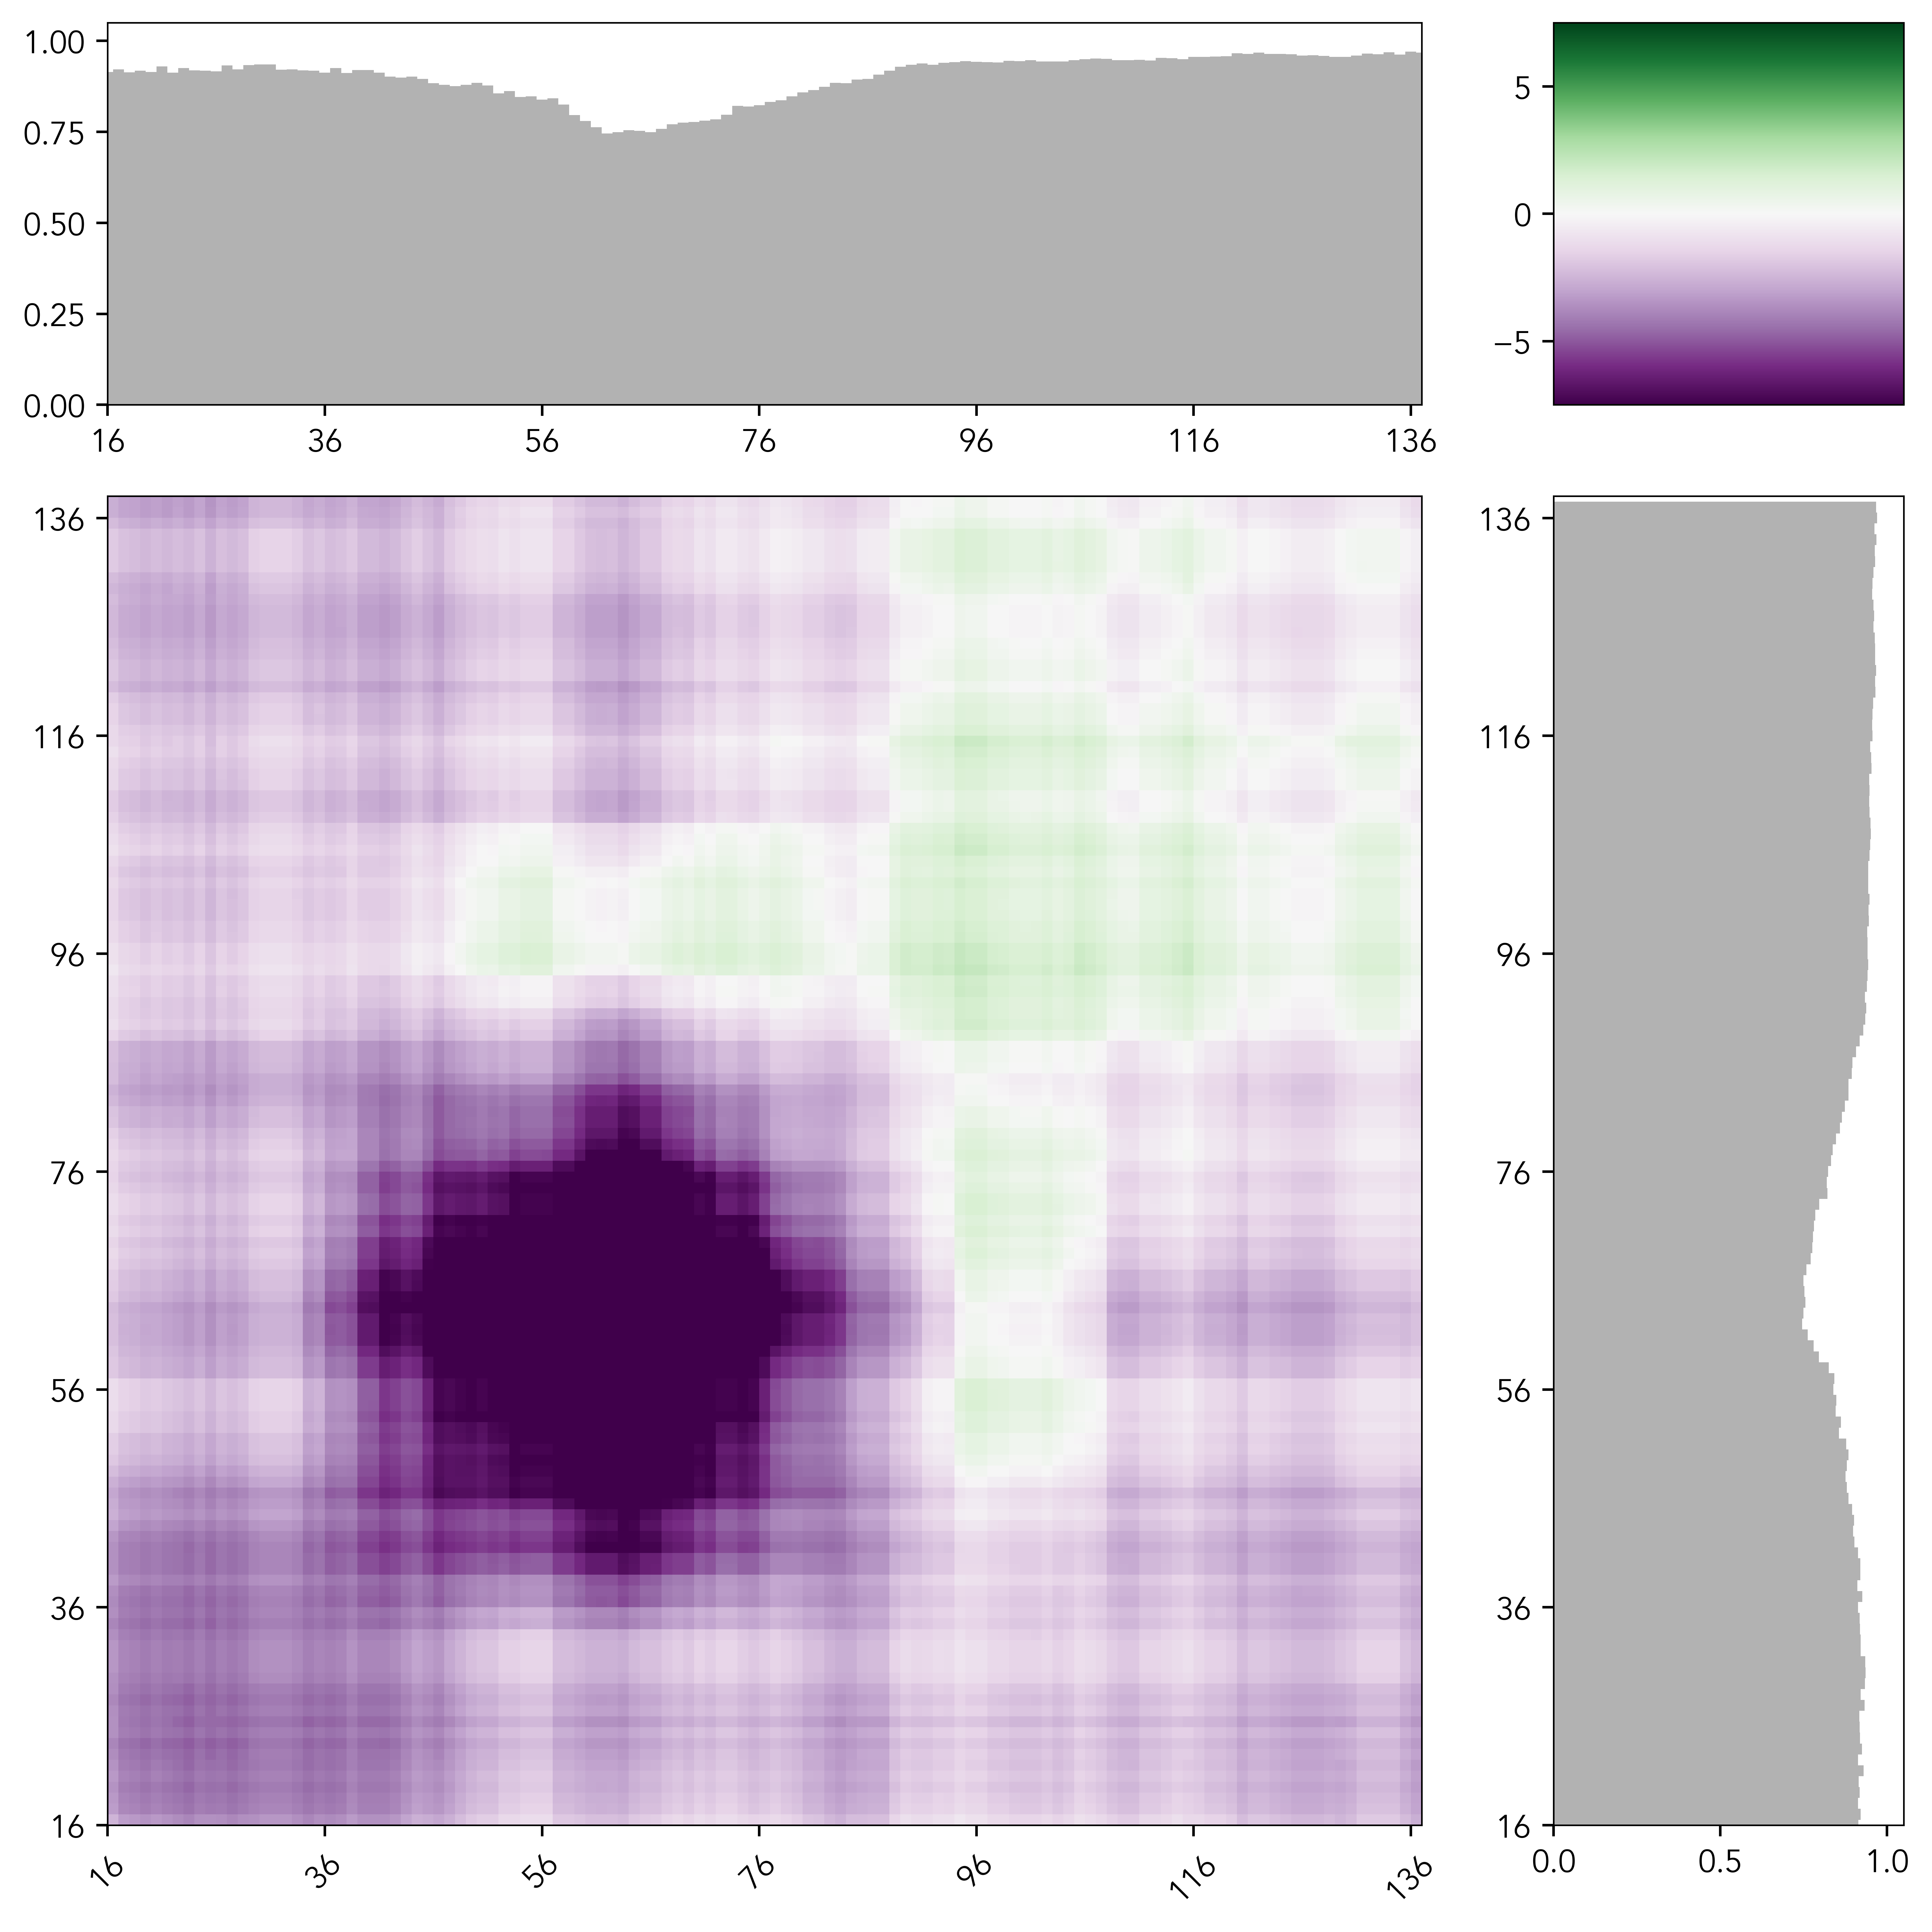

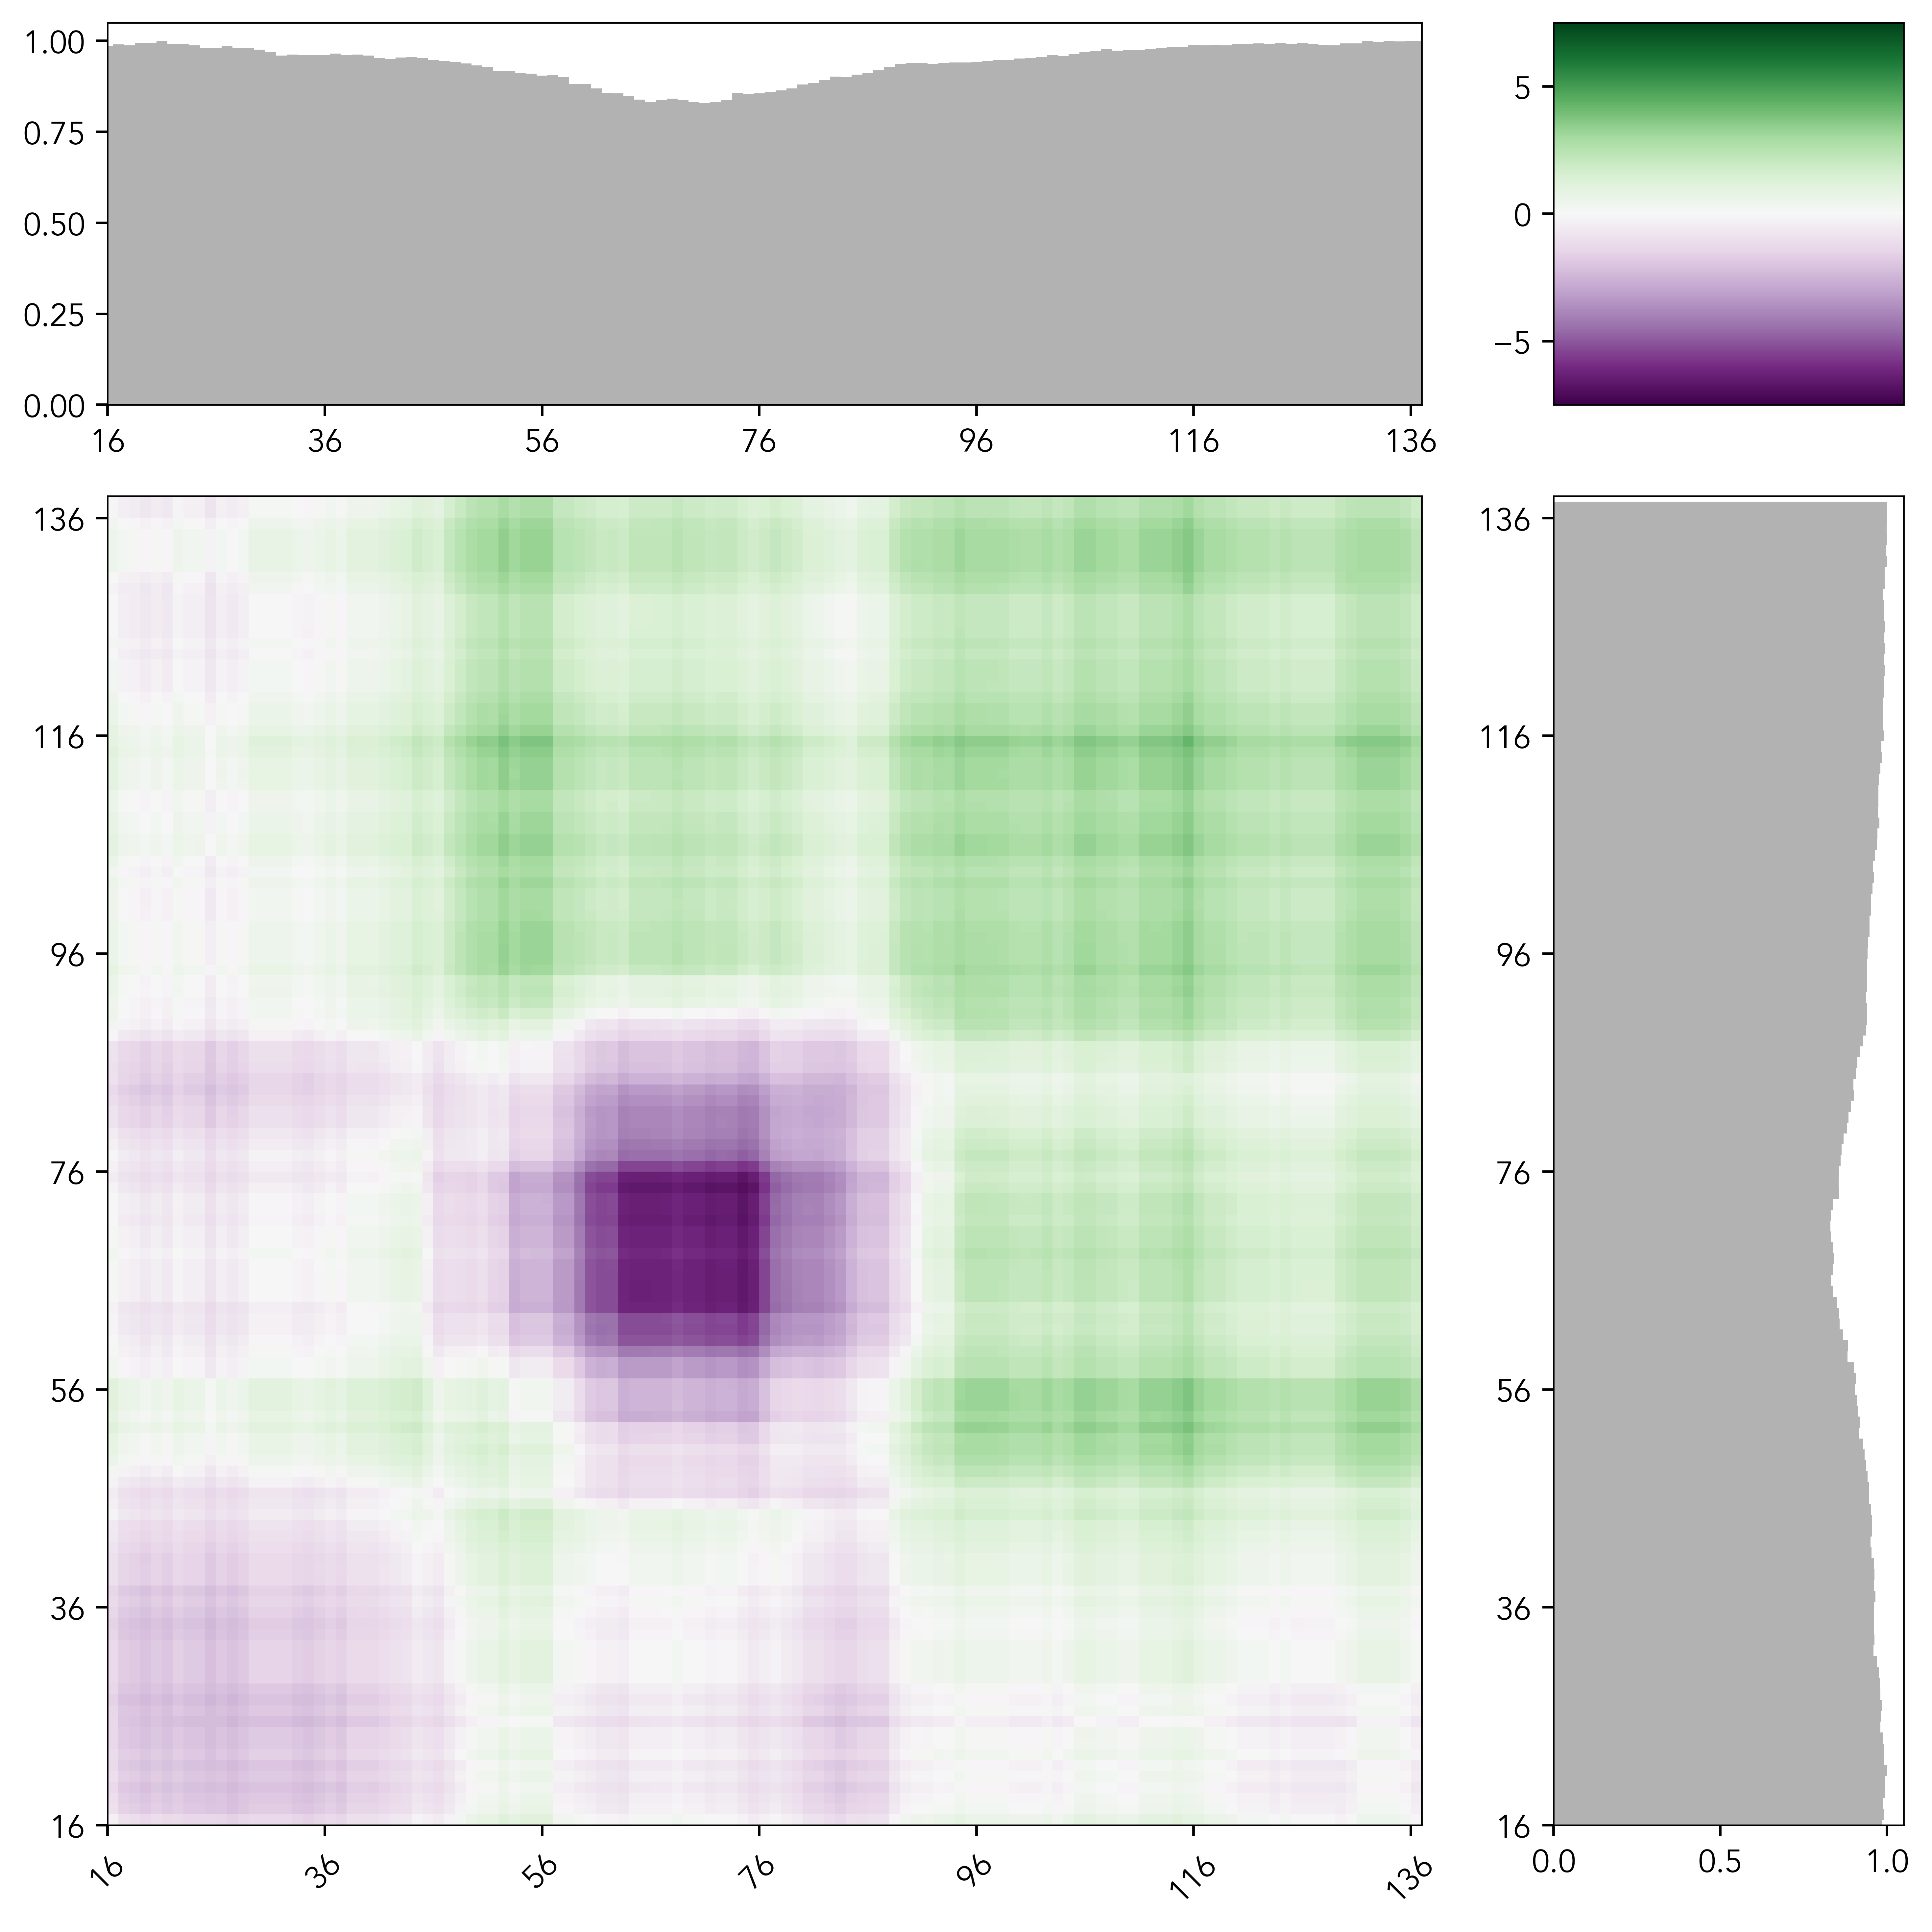

In [6]:
for k in tdp43_seqs:
    cf.interaction_figure(tdp43_seqs[k][0], tdp43_seqs[k][0], tic_frequency=20, fname=f'out_figures/tdp43_{k}.pdf')

0.019230769230769225
-0.051282051282051294


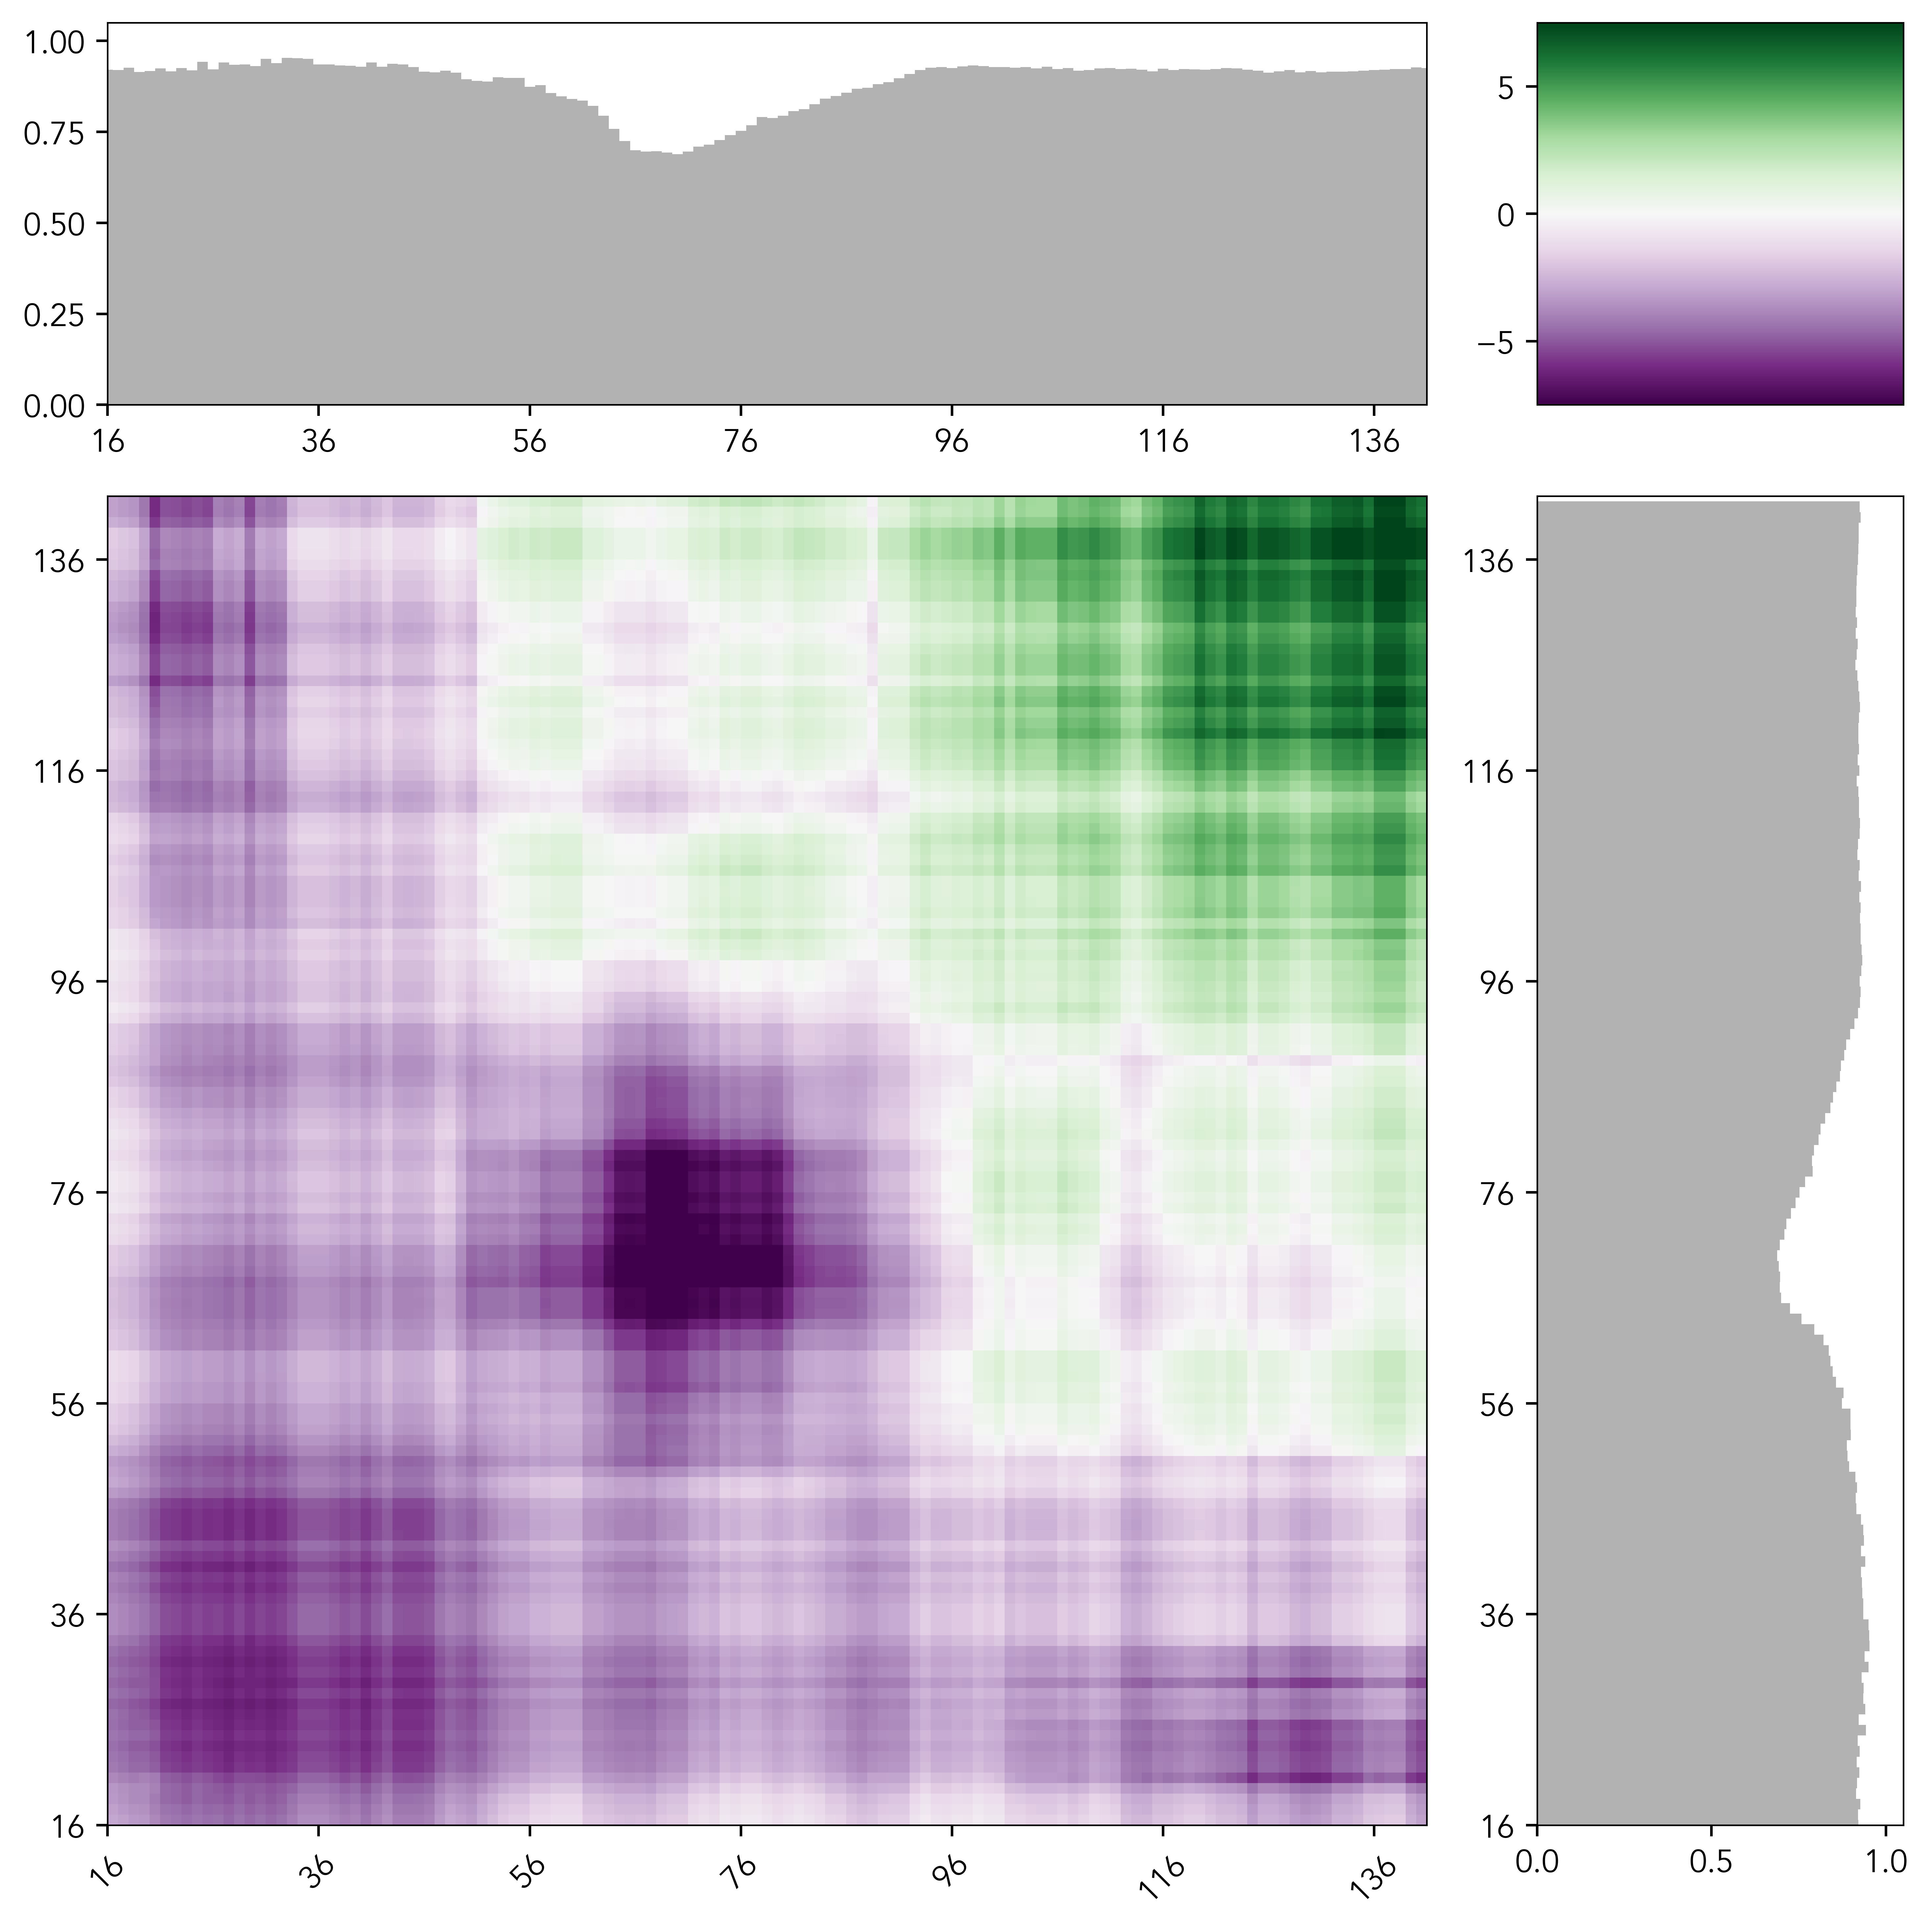

In [7]:


ctd_phosphomimetic = 'NAEPKHNSNRQLERSGRFGGNPGGFGNQGGFGNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNDYDGSNDGAAIGWGDADNAGDGDGFNGGFGDDMDSKDDGWGM'

cf.interaction_figure(ctd_phosphomimetic, ctd_phosphomimetic, tic_frequency=20, fname=f'out_figures/tdp43_phos.pdf')


print(Protein(tdp43_ctd).NCPR)
print(Protein(ctd_phosphomimetic).NCPR)


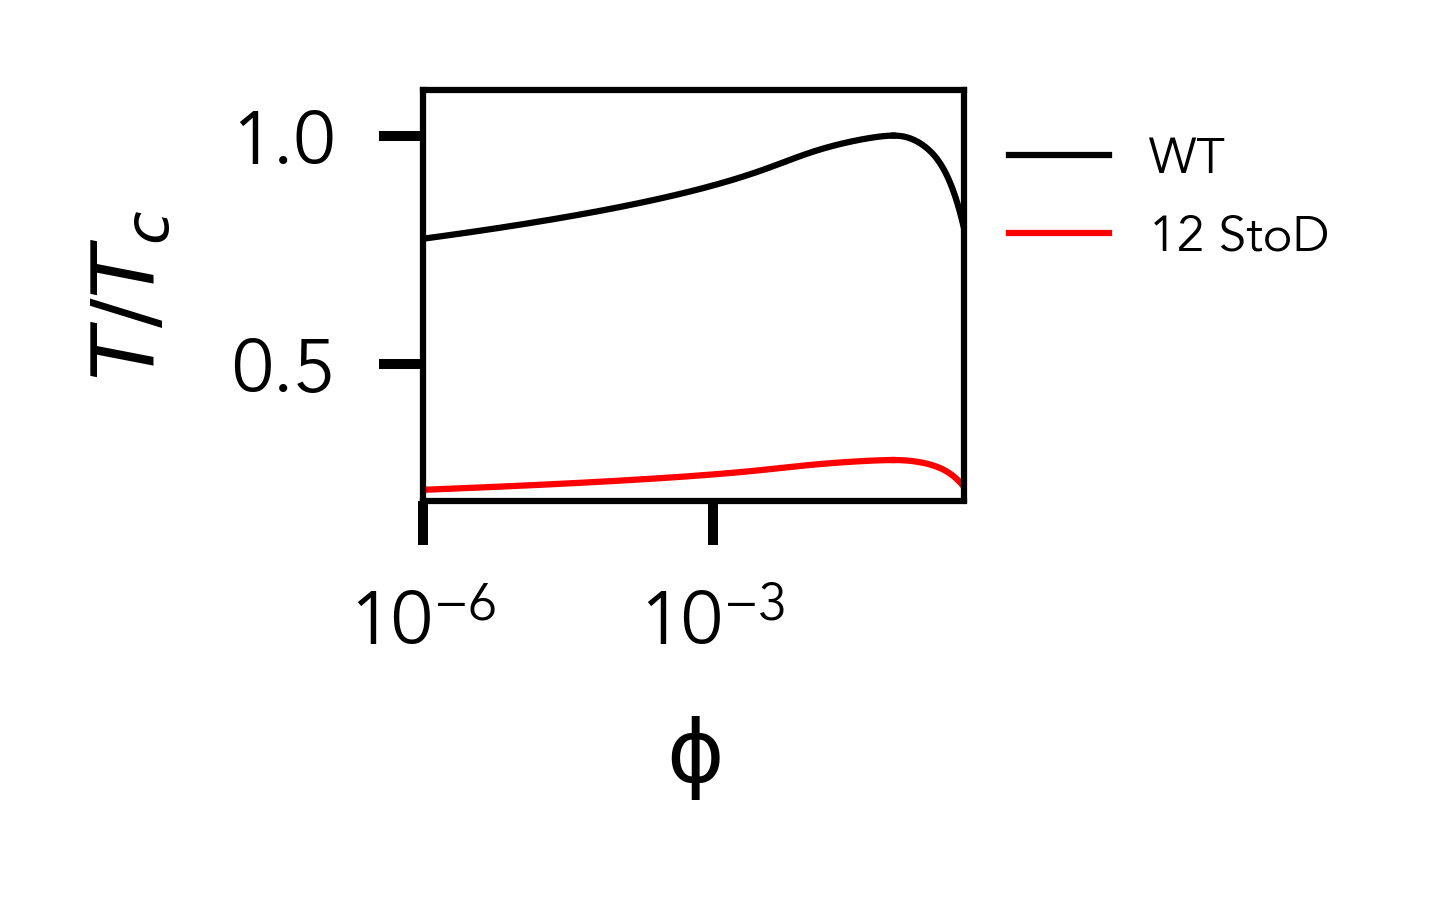

In [73]:
out = cf.plot_multiple_phase_diagrams({'WT':[tdp43_ctd,'k'], '12 StoD':[ctd_phosphomimetic, 'r']}, tc_ref='WT', xlim=[0.000001,0.4], ylim=[0.2,1.1],height=1.1,xlog=True, width=1.7, filename='out_figures/tdp43_phos_phase_diagram.pdf')




In [8]:
tdp43_seqs['12StoE'] = ['NAEPKHNSNRQLERSGRFGGNPGGFGNQGGFGNSRGGGAGLGNNQGSNMGGGMNFGAFSINPAMMAAAQAALQSSWGMMGMLASQQNQSGPSGNNQNQGNMQREPNQAFGSGNNDYDGSNDGAAIGWGDADNAGDGDGFNGGFGDDMDSKDDGWGM','r']



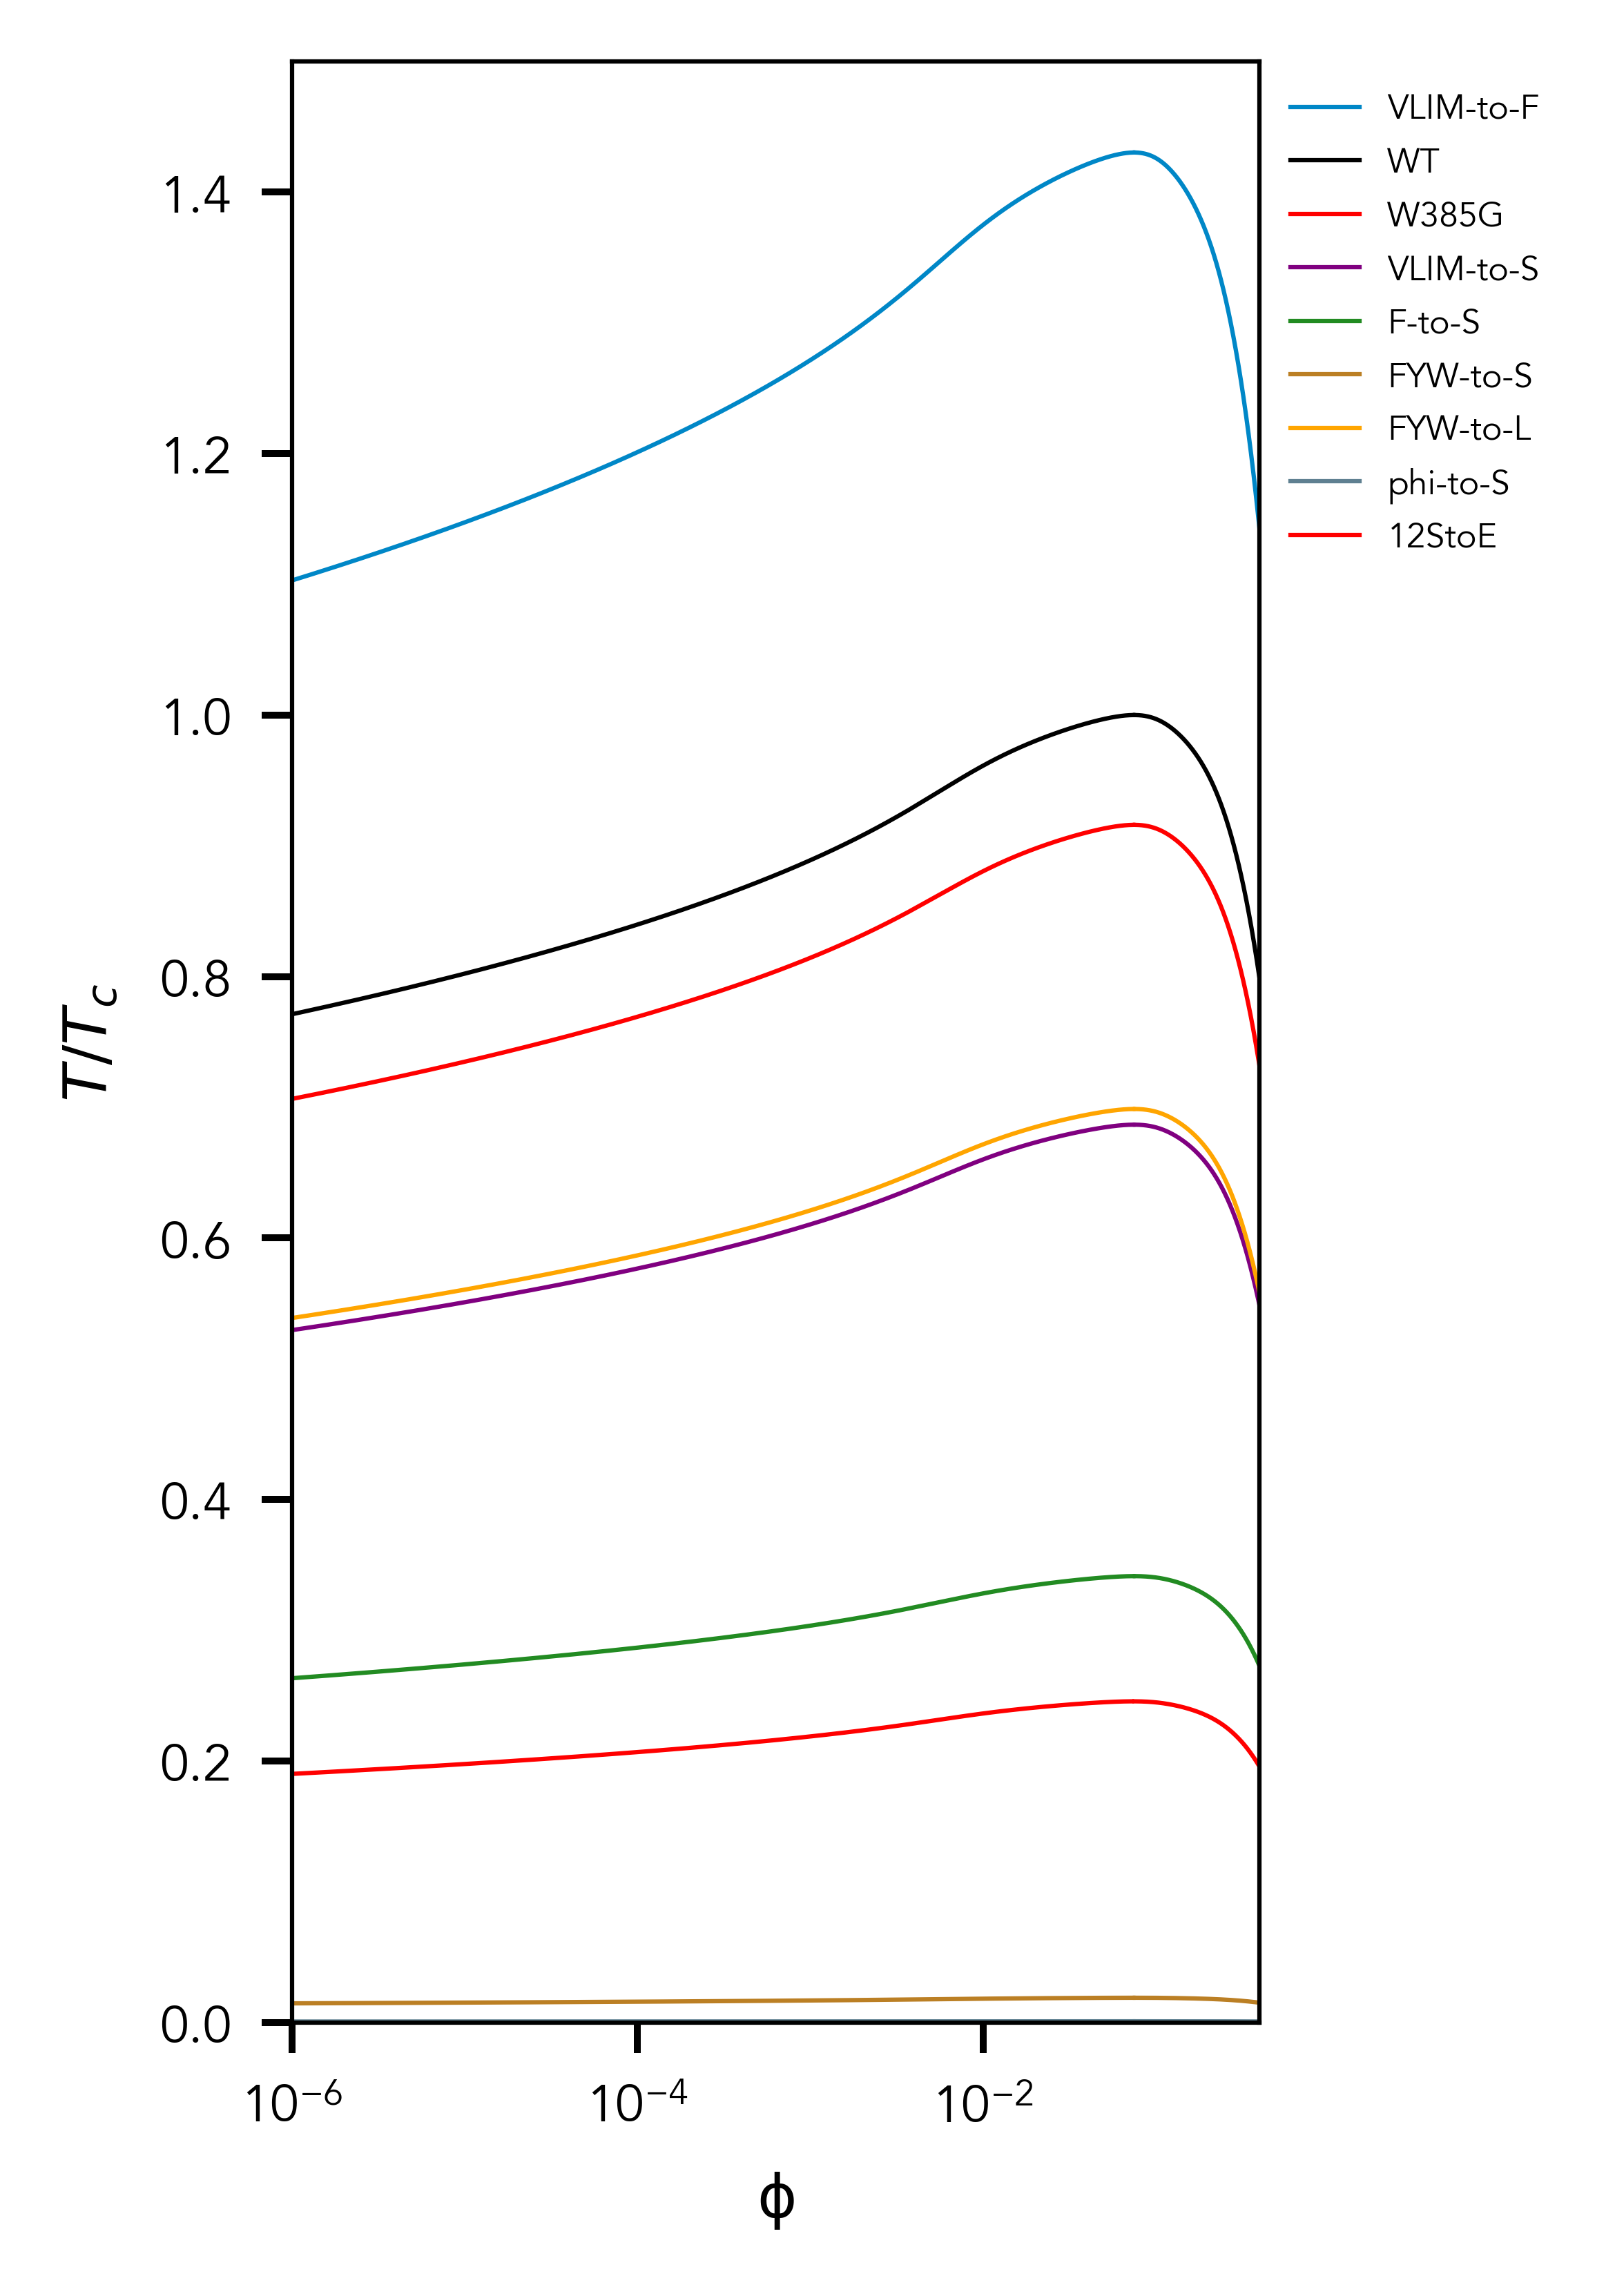

In [9]:
out = cf.plot_multiple_phase_diagrams(tdp43_seqs, tc_ref='WT', xlim=[0.000001,0.4], ylim=[0,1.5],height=3.8,xlog=True, width=2.7, filename='out_figures/tdp43_phase_diagram_with_phos.pdf')

